# **Análisis Exploratorio de Datos**

El análisis exploratorio de datos es una herramienta esencial para que las empresas, ya que mediante este anális podemos descubrir patrones, tendencias y anomalías que de otra manera pasarían desapercibidas. A través de este proceso, las compañías pueden tomar decisiones más informadas identificar nuevas oportunidades de negocio, optimizar sus procesos y mejorar la experiencia a sus clientes.

**Objetivo:**

 Realizar un análisis exhaustivo del comportamiento del sector de telecomunicaciones a nivel nacional, con foco en los servicios de internet, para generar insights que permitan a *NewStart* optimizar la calidad de sus servicios e identificar nuevas oportunidades de negocio.

### 1 Importamos las librerias a utilizar

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
# Configuración de visualización
sns.set_style("whitegrid") # Estilo visual, fondo blanco y cuadricula en gris

### 2. Ingesta de datos

In [2]:
# Creamos una variable para la ruta del arvhivo Inrternet
ruta_archivo = 'D:/2024/HenryData/PI_2/Datos Brutos/Internet.xlsx'
xls = pd.ExcelFile(ruta_archivo)
# Imprimimos el nombre de la hojas que contiene el archivo Internet.
print(xls.sheet_names)

['Acc_vel_loc_sinrangos', 'Velocidad_sin_Rangos', 'Accesos_tecnologia_localidad', 'Velocidad % por prov', 'Totales VMD', 'Totales Accesos Por Tecnología', 'Accesos Por Tecnología', 'Penetración-poblacion', 'Penetracion-hogares', 'Penetracion-totales', 'Totales Accesos por rango', 'Accesos por rangos', 'Dial-BAf', 'Totales Dial-BAf', 'Ingresos']


### 3. Análisis General de los Datos

In [3]:
# Realizamos una función para determinar el porcentaje de valores nulos y duplicados en cada una de las hojas del archivo Internet

def calcular_porcentaje_nulos_duplicados(ruta_archivo):
    # Cargar el archivo Excel
    xls = pd.ExcelFile(ruta_archivo)

    # Crear un diccionario para almacenar los resultados
    resumen_datos = []

    # Iterar sobre cada hoja en el archivo
    for hoja in xls.sheet_names:
        # Leer la hoja con manejo de posibles valores nulos
        df = pd.read_excel(xls, hoja, na_values=["", " ", "NaN", None])
        df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)  # Remover espacios en blanco
        df = df.replace("", np.nan)  # Convertir celdas vacías en NaN

        # Calcular el porcentaje de valores nulos
        porcentaje_nulos = df.isnull().mean().mean() * 100

        porcentaje_duplicados = df.duplicated().mean() * 100

        
        # Agregar resultados al resumen
        resumen_datos.append({
            'Hoja': hoja,
            'Porcentaje Nulos': porcentaje_nulos,
            'Porcentaje Duplicados': porcentaje_duplicados,
            
        })

    # Convertir a DataFrame
    df_resumen = pd.DataFrame(resumen_datos)

    return df_resumen

def mostrar_tabla_estilizada(df_resumen):
    # Definir la función para aplicar estilos a los valores de la tabla
    def resaltar_porcentaje(val):
        if val == 0:
            color = 'lightgreen'
        elif val > 0 and val <= 10:
            color = 'lightyellow'
        else:
            color = 'lightcoral'
        return f'background-color: {color}'

    # Aplicar estilos a la tabla
    styled_table = df_resumen.style.applymap(resaltar_porcentaje, subset=['Porcentaje Nulos', 'Porcentaje Duplicados'])

    # Mostrar la tabla estilizada
    #display(styled_table)

# Uso de las funciones

resumen_resultado = calcular_porcentaje_nulos_duplicados(ruta_archivo)
#mostrar_tabla_estilizada(resumen_resultado)

In [4]:
# Mostramos el resultado de la función con el Porcentaje de Nulos y Duplciados.
resumen_resultado.head(16)

,Hoja,Porcentaje Nulos,Porcentaje Duplicados
0,Acc_vel_loc_sinrangos,0.007068,0.00000
1,Velocidad_sin_Rangos,0.010591,0.00000
2,Accesos_tecnologia_localidad,0.012898,0.00000
3,Velocidad % por prov,0.000000,0.00000
4,Totales VMD,0.000000,0.00000
5,Totales Accesos Por Tecnología,0.000000,0.00000
6,Accesos Por Tecnología,0.176192,0.00000
7,Penetración-poblacion,0.000000,0.00000
8,Penetracion-hogares,0.000000,0.00000
9,Penetracion-totales,0.000000,0.00000


**Hallazgos:**

El análisis preliminar del archivo "Internet" reveló que 5 de sus 15 hojas contienen datos faltantes, mientras que una presenta tanto datos faltantes como duplicados. Es por ello  que se ha decidido excluirlos del análisis principal. El resto de las hojas serán evaluadas de manera selectiva para identificar patrones relevantes que contribuyan al logro de nuestros objetivos.

### 4. Análisis por Hojas

### 4.1. Hoja 4: Velocidad % por prov

Distribución porcentual de la velocidad de conexión a internet por provincia.


In [5]:
# Carga de datos en un df
df1 = pd.read_excel(ruta_archivo, sheet_name='Velocidad % por prov')
#D:\2024\HenryData\PI_2\Datos Brutos\Internet.xlsx

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     1008 non-null   int64  
 1   Trimestre               1008 non-null   int64  
 2   Provincia               1008 non-null   object 
 3   Mbps (Media de bajada)  1008 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 31.6+ KB


In [7]:
df1.head()

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2024,2,Buenos Aires,157.41
1,2024,2,Capital Federal,233.01
2,2024,2,Catamarca,97.38
3,2024,2,Chaco,107.76
4,2024,2,Chubut,21.67


Cantidad de datos nulos

In [8]:
# Observamos la cantidad de datos nulos 
df1.isnull().sum() # No existen datos nulos

Año                       0
Trimestre                 0
Provincia                 0
Mbps (Media de bajada)    0
dtype: int64

Observamos los nombres de la provincias de Argentina y Uniformizamos si hubiera inconsitencias

In [9]:
# Obtener lista de nombres únicos de provincias
print(df1['Provincia'].unique())

# Uniformizar nombres de provincias si hay inconsistencias
# Por ejemplo, si hay variaciones en mayúsculas/minúsculas:
df1['Provincia'] = df1['Provincia'].str.title()

['Buenos Aires' 'Capital Federal' 'Catamarca' 'Chaco' 'Chubut' 'Córdoba'
 'Corrientes' 'Entre Ríos' 'Formosa' 'Jujuy' 'La Pampa' 'La Rioja'
 'Mendoza' 'Misiones' 'Neuquén' 'Río Negro' 'Salta' 'San Juan' 'San Luis'
 'Santa Cruz' 'Santa Fe' 'Santiago Del Estero' 'Tierra Del Fuego'
 'Tucumán']


In [10]:
# Creamos una columna de 'Fecha' con el primer día del trimestre
df1['Fecha'] = pd.to_datetime(df1['Año'].astype(str) + '-Q' + df1['Trimestre'].astype(str))

In [11]:

# Vista rápida de las primeras filas
df1.head()

,Año,Trimestre,Provincia,Mbps (Media de bajada),Fecha
0,2024,2,Buenos Aires,157.41,2024-04-01
1,2024,2,Capital Federal,233.01,2024-04-01
2,2024,2,Catamarca,97.38,2024-04-01
3,2024,2,Chaco,107.76,2024-04-01
4,2024,2,Chubut,21.67,2024-04-01


Evolución de la velocidad de descarga promedio de internet a Nivel Nacional (2014-2024)

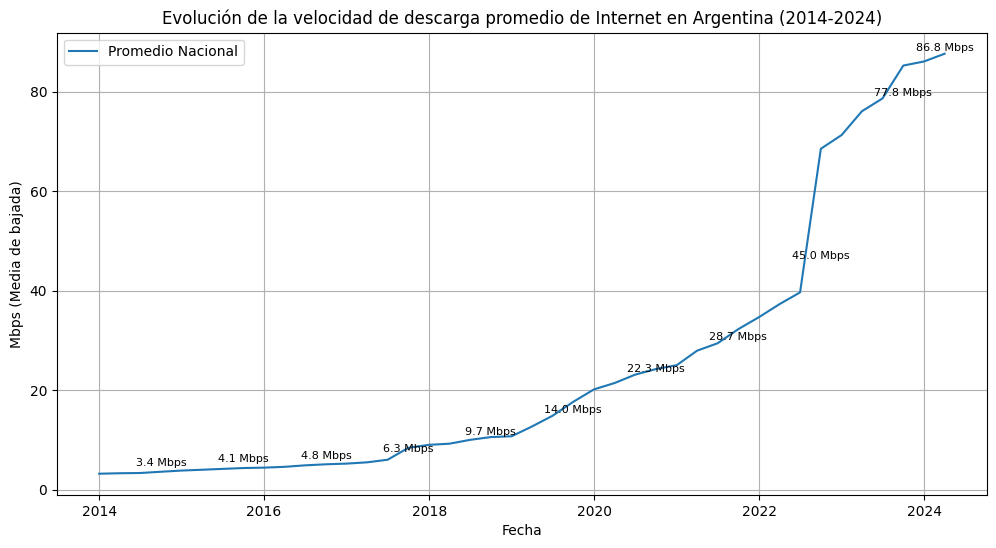

In [12]:
# Calcular promedio de Mbps por fecha
df_avg = df1.groupby('Fecha')['Mbps (Media de bajada)'].mean().reset_index()

# Visualización de la tendencia general
# Usa el estilo por defecto
plt.style.use('default')

# Crea la figura
plt.figure(figsize=(12, 6))

# Traza la línea con los valores
plt.plot(df_avg['Fecha'], df_avg['Mbps (Media de bajada)'], label='Promedio Nacional')

# Etiquetas de los ejes y título
plt.xlabel('Fecha')
plt.ylabel('Mbps (Media de bajada)')
plt.title('Evolución de la velocidad de descarga promedio de Internet en Argentina (2014-2024)')
plt.legend()
plt.grid(True)

# Anota los valores por año
for year in range(2014, 2025):
    # Selecciona el promedio de velocidad de bajada para cada año
    yearly_data = df_avg[df_avg['Fecha'].dt.year == year]
    if not yearly_data.empty:
        avg_speed = yearly_data['Mbps (Media de bajada)'].mean()
        date_label = yearly_data['Fecha'].iloc[-1]
        
        # Anota el valor en el gráfico
        plt.annotate(f'{avg_speed:.1f} Mbps',  # texto de la anotación
                     (date_label, avg_speed),  # coordenadas en el gráfico
                     textcoords="offset points",  # posiciona ligeramente fuera del punto
                     xytext=(0, 5),  # desplaza la anotación ligeramente hacia arriba
                     ha='center',  # alineación horizontal
                     fontsize=8,   # tamaño de la fuente
                     color='black')  # color del texto

# Mostrar el gráfico
plt.show()

Interpretación:

En un período de 10 años, se observa una tendencia ascendente bastante marcada en la velocidad de bajada promedio de internet en Argentina; en 2014, la velocidad promedio era relativamente baja, apenas por encima de los 3 Mbps; sin embargo a medida que avanza el tiempo, la velocidad de bajada aumenta de forma significativa, especialmente a partir de 2018. Este crecimiento podría reflejar inversiones en infraestructura de telecomunicaciones, como la expansión de redes de fibra y otras tecnologías avanzadas.

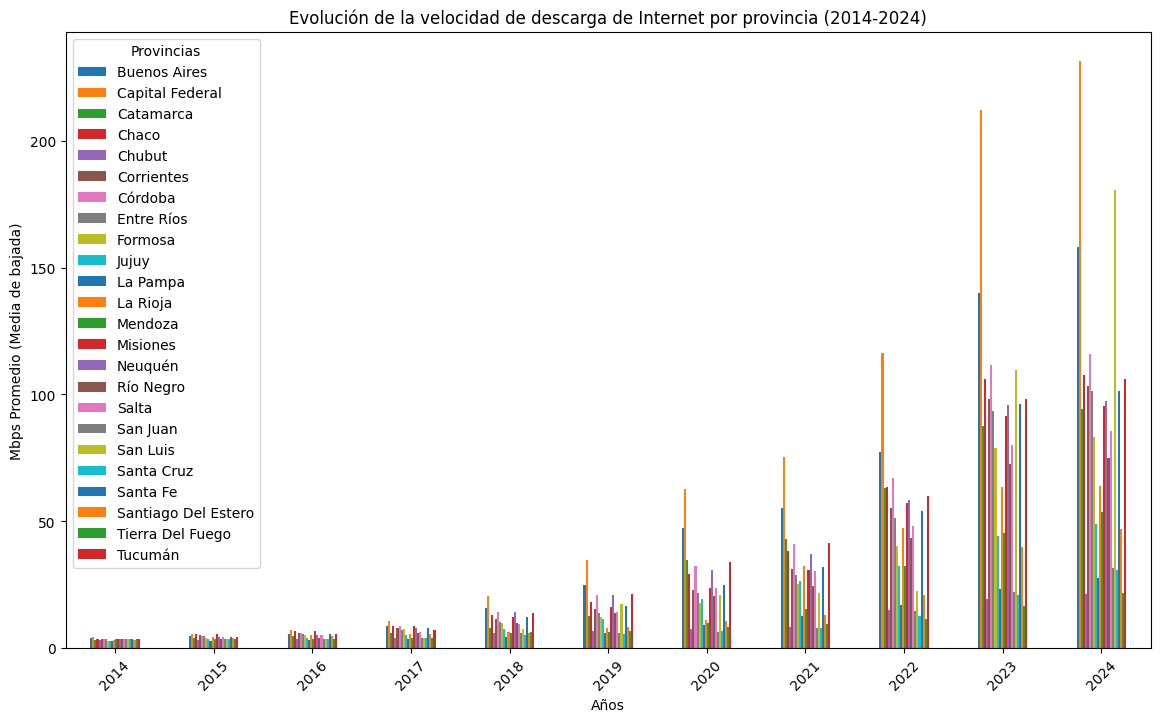

In [13]:

# Calcular el Mbps promedio por provincia y año
promedio_por_provincia_ano = df1.groupby(['Año', 'Provincia'])['Mbps (Media de bajada)'].mean().unstack()

# Opcional: Crear un gráfico de barras apiladas para visualizar el promedio por provincia y año
promedio_por_provincia_ano.plot(kind='bar', stacked=False, figsize=(14, 8))
plt.title('Evolución de la velocidad de descarga de Internet por provincia (2014-2024)')
plt.xlabel('Años')
plt.ylabel('Mbps Promedio (Media de bajada)')
plt.xticks(rotation=45)
plt.legend(title='Provincias')
plt.show()

Interpretación: 

En el gráfico podemos observar que todas las provincias de Argentina a lo largo de los años muestran una tendencia creciente en la velocidad de descarga de Internet. Esto significa un avance significativo en la infraestructura de telecomunicaciones del país y un mayor acceso a los servcicios de internet de alta velocidad para los ciudadanos. Sin embargo, también se evidencia una desigualdad en las velocidades promedio entre las provincias. Es por ello que realizaremos un análisis más detallado. 

Análisis de la velocidad de bajada de Internet de los años 2019-2024 

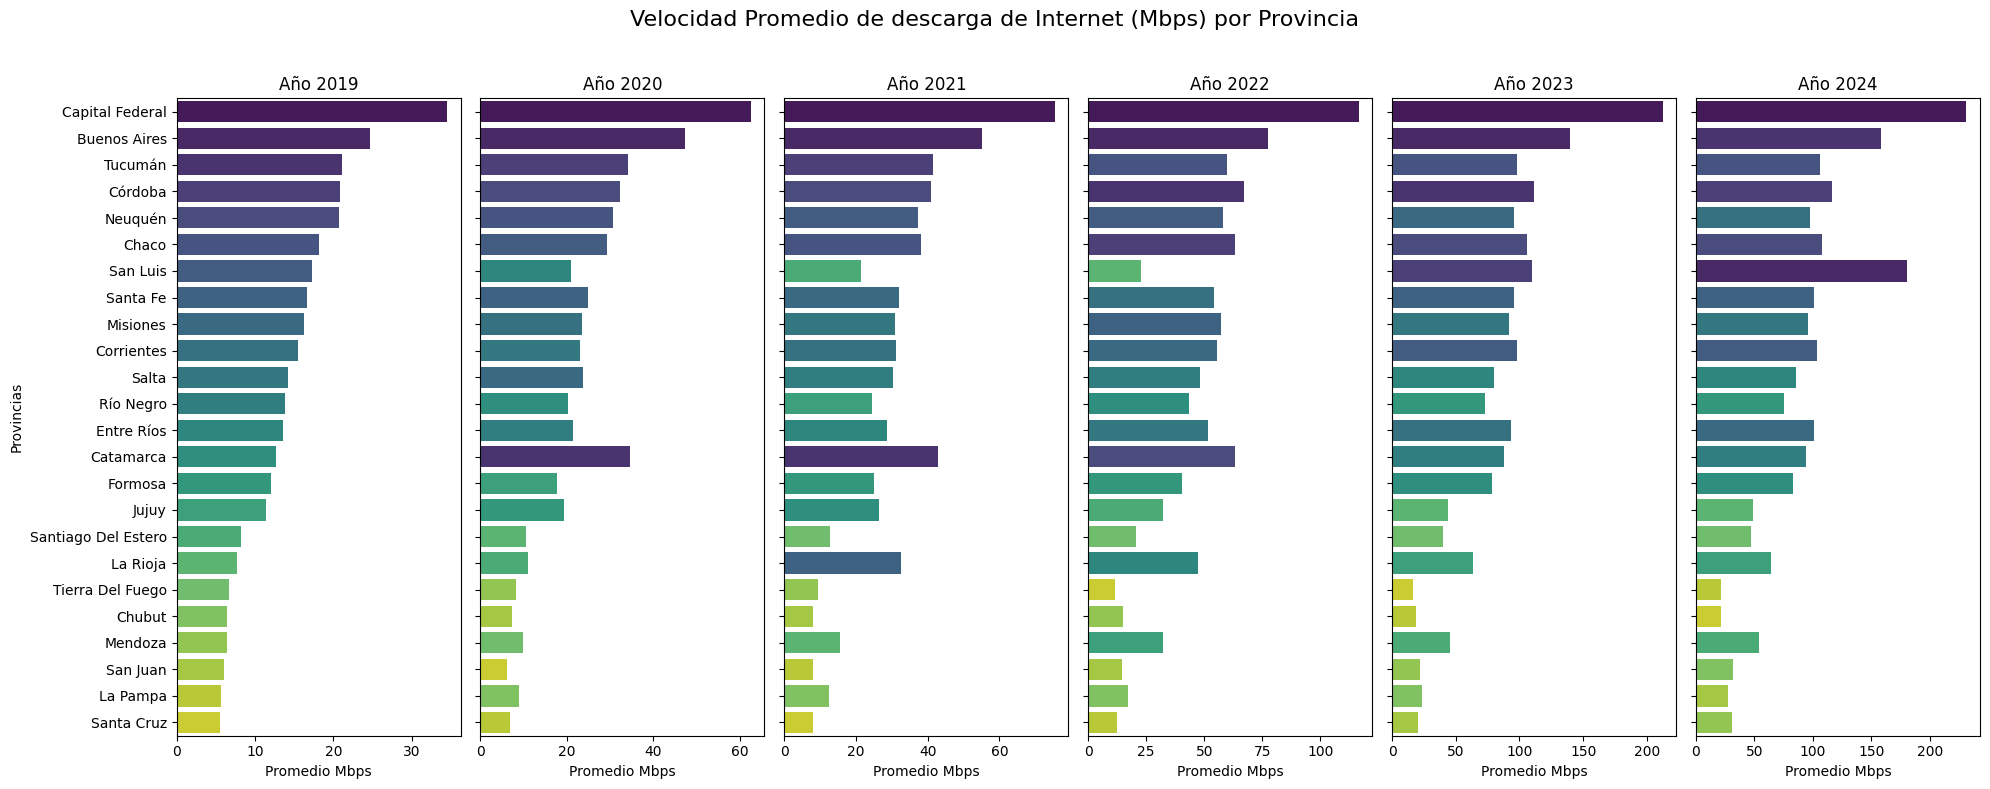

In [14]:
# Realizamos la funcion que no ayudará a realizar un análisis más detallado de la velocidad de bajada de Internet de loa años 2019-2024

# Lista de años a analizar
anios_analisis = [2019, 2020, 2021, 2022, 2023, 2024]

# Función para gráficar el análisis por año y provincias 
def graficar_analisis_por_anio(df, anios, columna_provincia='Provincia', columna_velocidad='Mbps (Media de bajada)', columna_anio='Año'):

    # Configurar la figura y el layout
    fig, axes = plt.subplots(1, len(anios), figsize=(20, 8), sharey=True)
    fig.suptitle('Velocidad Promedio de descarga de Internet (Mbps) por Provincia', fontsize=16)

    for i, anio in enumerate(anios):
        # Filtrar datos por año
        df_anio = df[df[columna_anio] == anio]

        # Calcular promedio de velocidad por provincia
        promedio_velocidad = df_anio.groupby(columna_provincia)[columna_velocidad].mean().sort_values(ascending=False).reset_index()

        # Graficar
        sns.barplot(
            data=promedio_velocidad, 
            x=columna_velocidad, 
            y=columna_provincia, 
            ax=axes[i], 
            palette='viridis'
        )
        axes[i].set_title(f'Año {anio}')
        axes[i].set_xlabel('Promedio Mbps')
        axes[i].set_ylabel('' if i > 0 else 'Provincias')  # Mostrar el eje y solo en el primer gráfico

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajustar layout
    plt.show()

# Llamada a la función
graficar_analisis_por_anio(df1, anios_analisis)

**Hallazgos e interpretación:**

El análisis se realizar a partir del año 2019, debido a que en los gráficos anteriores se ha observado una tendencia mucho más marcada en el 2019 en adelante. 

En general en el gráfico se observa una tendencia al creciente en la velocidad de descarga de internet en todas las provincias a lo largo de los años analizados. Esto indica un progreso significativo en la infraestructura de telecomunicaciones en Argentina y un mayor acceso a servicios de internet de alta velocidad para los ciudadanos. Sin embargo, existen diferencias significativas entre las provincias. Algunas provincias, como la Ciudad autónoma de Buenos Aires denominada también Capital Federal y la provincia de Buenos Aires, muestran velocidades promedio mucho más altas que otras provincias, lo que sugiere una mayor inversión en infraestructura y una demanda más alta de servicios de internet en estas provincias.

Asimismo, las provincias muestran diferentes patrones de crecimiento; observándose que algunas de ellas experimentan un crecimiento más rápido que otras, lo que nos indicaría que podría estar relacionado con factores como inversión en infraestructura de telecomunicaciones, competencia entre proveedores que brindan el servicio de internet o un mayor desarrollo económico.

También se observa que existe un gran potencial para mejorar la velocidad de internet de muchas provincias, especialmente en aquellas con velocidades más bajas.

A raíz de este análisis también nos preguntamos ¿Qué tipo de tecnologías existen o predominan en estas provincias?, por ello análizaremos la siguiente hoja del archivo Internet.

In [15]:
df1.head()

,Año,Trimestre,Provincia,Mbps (Media de bajada),Fecha
0,2024,2,Buenos Aires,157.41,2024-04-01
1,2024,2,Capital Federal,233.01,2024-04-01
2,2024,2,Catamarca,97.38,2024-04-01
3,2024,2,Chaco,107.76,2024-04-01
4,2024,2,Chubut,21.67,2024-04-01


In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Año                     1008 non-null   int64         
 1   Trimestre               1008 non-null   int64         
 2   Provincia               1008 non-null   object        
 3   Mbps (Media de bajada)  1008 non-null   float64       
 4   Fecha                   1008 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 39.5+ KB


### KPI 1:
- Incrementar en un 5% la velocidad descarga de internet 

In [17]:
# Paso 1: Calcular la velocidad promedio por provincia
velocidad_promedio_provincia = df1.groupby('Provincia')['Mbps (Media de bajada)'].mean().reset_index()
velocidad_promedio_provincia.columns = ['Provincia', 'Velocidad_Promedio_Provincia']

# Paso 2: Combinar la velocidad promedio por provincia con el DataFrame original
df1 = df1.merge(velocidad_promedio_provincia, on='Provincia')

# Paso 3: Identificar las provincias con baja velocidad (menor al promedio de su provincia)
df_baja_velocidad = df1[df1['Mbps (Media de bajada)'] < df1['Velocidad_Promedio_Provincia']].copy()

# Paso 4: Calcular el nuevo acceso aumentando en un 5% la velocidad de descarga
df_baja_velocidad.loc[:, 'Nueva_Velocidad'] = df_baja_velocidad['Mbps (Media de bajada)'] * 1.05

# Paso 5: Calcular el KPI del aumento de velocidad
df_baja_velocidad.loc[:, 'KPI_Aumento_Velocidad'] = ((df_baja_velocidad['Nueva_Velocidad'] - df_baja_velocidad['Mbps (Media de bajada)']) / 
                                                     df_baja_velocidad['Mbps (Media de bajada)']) * 100

# Mostrar el resultado
df_kpi_1 = df_baja_velocidad.copy()

In [18]:
df_kpi_1.head()

,Año,Trimestre,Provincia,Mbps (Media de bajada),Fecha,Velocidad_Promedio_Provincia,Nueva_Velocidad,KPI_Aumento_Velocidad
186,2022,3,San Luis,19.330000,2022-07-01,28.983817,20.296500,5.0
210,2022,2,San Luis,19.320000,2022-04-01,28.983817,20.286000,5.0
234,2022,1,San Luis,20.950000,2022-01-01,28.983817,21.997500,5.0
258,2021,4,San Luis,20.909724,2021-10-01,28.983817,21.955211,5.0
268,2021,3,Chubut,8.176860,2021-07-01,8.194332,8.585703,5.0


### 4.2 Hoj 7: Accesos Por Tecnología

Accesos a internet por tipo de tecnología.

Pregunta guía para el análisis:
¿Qué tipo de tecnologías existen o predominan en las provincias de Argentina?

Cargamos los datos en df2

In [19]:
df2 = pd.read_excel(ruta_archivo, sheet_name='Accesos Por Tecnología')

df2.head(2)

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2024,2,Buenos Aires,214055.0,2722466.0,1849476.0,138638.0,64745.0,4989380.0
1,2024,2,Capital Federal,54102.0,1144781.0,230402.0,4493.0,29821.0,1463599.0


In [20]:
df2.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           1008 non-null   object 
 1   Trimestre     1008 non-null   object 
 2   Provincia     1007 non-null   object 
 3   ADSL          1007 non-null   float64
 4   Cablemodem    1007 non-null   float64
 5   Fibra óptica  1007 non-null   float64
 6   Wireless      1007 non-null   float64
 7   Otros         1007 non-null   float64
 8   Total         1007 non-null   float64
dtypes: float64(6), object(3)
memory usage: 71.1+ KB


Tratamiento de los Datos Nulos

In [21]:
df2.isnull().sum()

Año             1
Trimestre       1
Provincia       2
ADSL            2
Cablemodem      2
Fibra óptica    2
Wireless        2
Otros           2
Total           2
dtype: int64

In [22]:
# Filtrar filas que contienen valores nulos
df_nulos = df2[df2.isnull().any(axis=1)]
print(df_nulos)

      Año                                          Trimestre Provincia  ADSL  \
1007  NaN                                                NaN       NaN   NaN   
1008    *  Los datos provinciales no coinciden a nivel na...       NaN   NaN   

      Cablemodem  Fibra óptica  Wireless  Otros  Total  
1007         NaN           NaN       NaN    NaN    NaN  
1008         NaN           NaN       NaN    NaN    NaN  


In [23]:

#Eliminar datos nulos
df2.dropna(inplace=True)

In [24]:
# Verificar duplicados
print(f"Número de filas duplicadas: {df2.duplicated().sum()}")


Número de filas duplicadas: 0


In [25]:
# Obtener lista de nombres únicos de provincias
print(df2['Provincia'].unique()) # se observa que existe 24 provincias únicas, la data no requiere transformación

['Buenos Aires' 'Capital Federal' 'Catamarca' 'Chaco' 'Chubut' 'Córdoba'
 'Corrientes' 'Entre Ríos' 'Formosa' 'Jujuy' 'La Pampa' 'La Rioja'
 'Mendoza' 'Misiones' 'Neuquén' 'Río Negro' 'Salta' 'San Juan' 'San Luis'
 'Santa Cruz' 'Santa Fe' 'Santiago Del Estero' 'Tierra Del Fuego'
 'Tucumán']


Observamos tipo de datos de las columnas

In [26]:
df2.dtypes

Año              object
Trimestre        object
Provincia        object
ADSL            float64
Cablemodem      float64
Fibra óptica    float64
Wireless        float64
Otros           float64
Total           float64
dtype: object

In [27]:
# Eliminar caracteres no deseados (como *) y espacios, luego convertir en datos enteros
df2['Año'] = df2['Año'].astype(str).str.replace(r'\*', '', regex=True).str.strip().astype(int)
df2['Trimestre'] = df2['Trimestre'].astype(str).str.replace(r'\*', '', regex=True).str.strip().astype(int)

In [28]:
# Verificamos los cambios
df2.dtypes

Año               int32
Trimestre         int32
Provincia        object
ADSL            float64
Cablemodem      float64
Fibra óptica    float64
Wireless        float64
Otros           float64
Total           float64
dtype: object

In [29]:
# Observamos si existen valores nulos, después de las transformaciones 
df2.isnull().sum()

Año             0
Trimestre       0
Provincia       0
ADSL            0
Cablemodem      0
Fibra óptica    0
Wireless        0
Otros           0
Total           0
dtype: int64

In [30]:
#Valores fuera de rango (negativos)
columnas_numericas = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total']
valores_fuera_de_rango = df2[(df2[columnas_numericas] < 0).any(axis=1)]

if not valores_fuera_de_rango.empty:
    print("\nValores fuera de rango (negativos):")
    print(valores_fuera_de_rango)
else:
    print("\nNo hay valores fuera de rango (negativos).")


No hay valores fuera de rango (negativos).


In [31]:
df2.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2024,2,Buenos Aires,214055.0,2722466.0,1849476.0,138638.0,64745.0,4989380.0
1,2024,2,Capital Federal,54102.0,1144781.0,230402.0,4493.0,29821.0,1463599.0
2,2024,2,Catamarca,4951.0,10303.0,58355.0,1384.0,81.0,75074.0
3,2024,2,Chaco,9448.0,57935.0,68944.0,8407.0,2358.0,147092.0
4,2024,2,Chubut,25955.0,80704.0,26516.0,31118.0,9930.0,174223.0


Análisis de la tendencia y contribución por tipo de tecnología para acceder a Internet 

In [32]:
# Función para el análisis
def acceso_tecnologia(df):
    # Filtramos solo los años válidos y excluir el año 2024
    df['Año'] = pd.to_numeric(df['Año'], errors='coerce')  # Convertir a número, manejar valores inválidos
    df['Trimestre'] = pd.to_numeric(df['Trimestre'], errors='coerce')  # Convertir a número
    
    # Filtramos años válidos entre 2014 y 2023 y trimestres entre 1 y 4
    df = df[(df['Año'].between(2014, 2023)) & (df['Trimestre'].between(1, 4))]

    # Convertir columnas de 'Año' y 'Trimestre' a un formato de fecha trimestral
    df['Fecha'] = df['Año'].astype(str) + '-Q' + df['Trimestre'].astype(str)
    df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce').dt.to_period('Q')

    # Agrupar por fecha y sumar los accesos de cada tecnología
    tech_trends = df.groupby('Fecha')[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].sum()

    # Aplicar una ventana deslizante para suavizar la serie de tiempo
    window_size = 4
    tech_trends_smoothed = tech_trends.rolling(window=window_size).mean()

    # Creamos el gráfico de líneas para cada tecnología
    plt.figure(figsize=(12, 6))
    for tech in tech_trends.columns:
        plt.plot(tech_trends.index.to_timestamp(), tech_trends[tech], label=tech)

    # Configurar etiquetas y título
    plt.xlabel('Fecha')
    plt.ylabel('Número de accesos')
    plt.title('Tendencia del acceso a internet por tecnología en Argentina (2014-2023)')
    plt.legend(title='Tecnología')
    plt.grid(True)
    plt.show()

    # Creamos un gráfico de área para visualizar la contribución de cada tecnología
    plt.figure(figsize=(12, 6))
    plt.stackplot(tech_trends.index.to_timestamp(), 
                  tech_trends['ADSL'], 
                  tech_trends['Cablemodem'], 
                  tech_trends['Fibra óptica'], 
                  tech_trends['Wireless'], 
                  tech_trends['Otros'], 
                  labels=tech_trends.columns)

    # Configurar etiquetas y título
    plt.xlabel('Fecha')
    plt.ylabel('Número de accesos')
    plt.title('Contribución acumulativa de tecnología en Argentina (2014-2023)')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

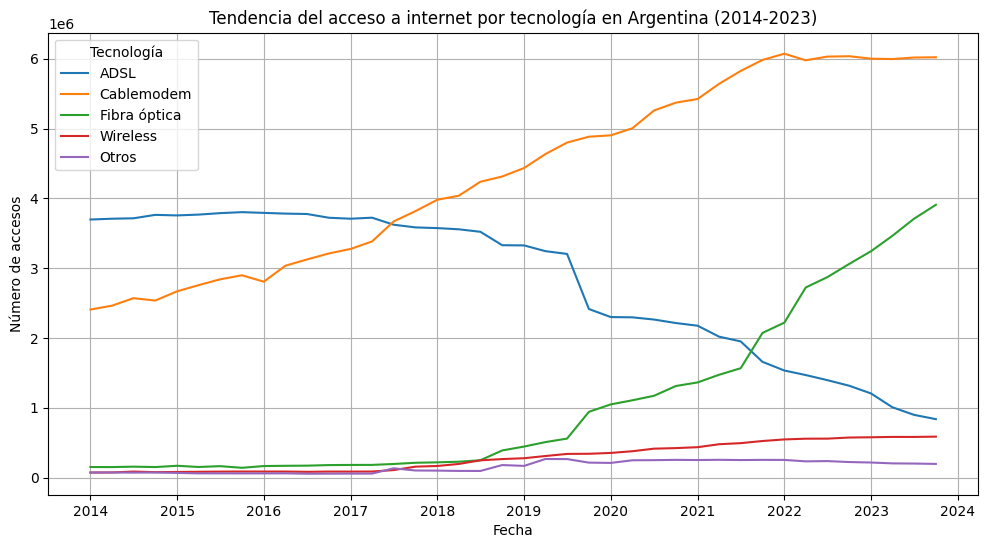

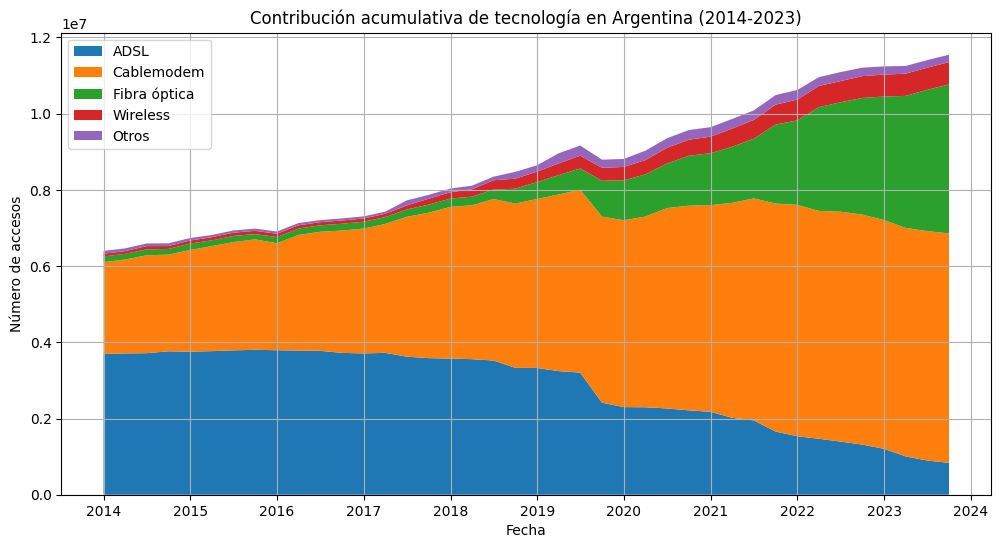

In [33]:
# Llamar a la función 
acceso_tecnologia(df2)

**Hallazgos e Interpretación:**

*Primer gráfico - Tendencia de acceso a Internet por tecnología (2014-2023)*

- *ADSL (línea azul):*
Muestra un declive constante desde aproximadamente 2018. Esto sugiere una migración de usuarios desde esta tecnología a alternativas más modernas.

- *Cablemodem (línea naranja):*
Se observa un crecimiento sostenido desde 2014 hasta cerca de 2023, con un ligero descenso o estabilización hacia el final del período. Esto indica que ha sido una opción popular para el acceso a Internet, pero podría haber alcanzado un punto de saturación.

- *Fibra óptica (línea verde):*
El crecimiento es notable a partir de 2018 y sigue en aumento. Esto refleja la tendencia hacia la adopción de tecnologías de alta velocidad, impulsadas por la mejora en la infraestructura y mayor demanda de conexión rápida.

- *Wireless (línea roja) y Otros (línea púrpura):*
Estas tecnologías han mantenido un uso relativamente bajo y estable en comparación con otras tecnologías, aunque hay un ligero aumento hacia el final del período.


*Segundo gráfico - Contribución acumulativa de tecnologías en Argentina (2014-2023)*

Este gráfico muestra cómo cada tecnología ha contribuido al total de accesos a Internet a lo largo del tiempo

- Cablemodem (sección naranja): Ha sido el contribuyente dominante en términos de acceso total, ocupando una gran parte del gráfico, especialmente después de 2018.
- ADSL (sección azul): Aunque era una tecnología importante al inicio del período, su participación ha disminuido considerablemente, lo que es consistente con su tendencia a la baja en el primer gráfico.
- Fibra óptica (sección verde): Ha ganado una mayor participación desde 2018 y sigue creciendo, indicando un cambio hacia conexiones más modernas y rápidas.
- Wireless y Otros: Su contribución sigue siendo marginal comparada con las principales tecnologías.

**Conclusió:**

En conclusión podemos decir que los gráficos muestran una clara tendencia de cambio tecnológico en el acceso a Internet en Argentina, con un desplazamiento hacia tecnologías más modernas como la fibra óptica y una disminución del uso de tecnologías más antiguas como ADSL.

La adopción de fibra óptica y el predominio del cablemodem sugieren una demanda creciente por velocidad y calidad en las conexiones, los cuales podrían traducirse en oportunidades de mercado en las provincias.
Las áreas de Wireless y Otros no han logrado ganar una cuota de mercado significativa en comparación con las tecnologías mencionadas.

Observamos la distribución de datos por tecnología

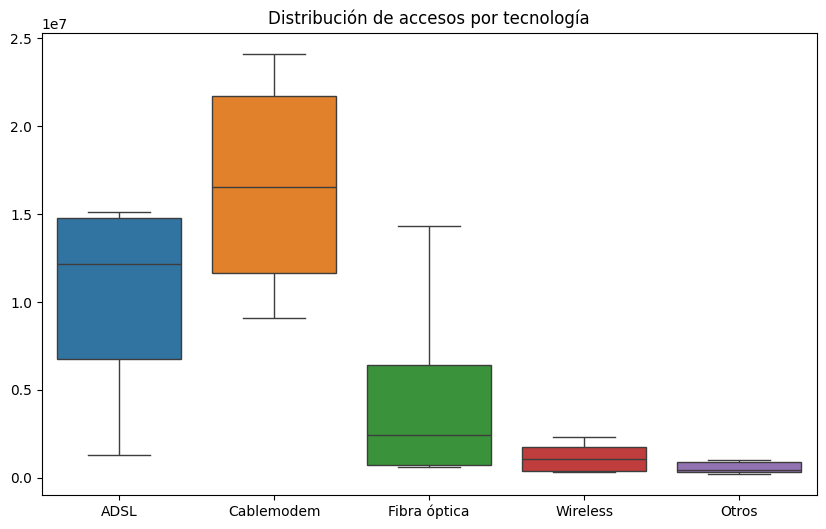

In [34]:
# Agrupamos por fecha y sumar los accesos de cada tecnología
tech_trends = df2.groupby('Año')[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].sum()

# Asegurarse que no haya valores negativos 
tech_trends = tech_trends.clip(lower=0)

# Creamos un gráfico de caja para identificar valores atípicos
plt.figure(figsize=(10, 6))
sns.boxplot(data=tech_trends)
plt.title('Distribución de accesos por tecnología')
plt.show()

**Interpretacion:** 

*ADSL (Azul):* La distribución de los accesos a la tecnología ADSL parece bastante centrada, con un rango intercuartílico moderado. Esto sugiere que, aunque ADSL sigue siendo una tecnología utilizada, su distribución entre las provincias es relativamente uniforme, sin grandes disparidades.

*Cablemódem (Naranja):* La caja de la tecnología del cablemódem es más alta y ancha que la de ADSL, lo que indica una mayor variabilidad en el número de accesos entre las provincias. Esto podría sugerir que el cablemódem es una tecnología más concentrada en ciertas provincias, probablemente las más urbanizadas.

*Fibra óptica (Verde):* La distribución de la tecnología de fibra óptica presenta un rango intercuartílico más bajo que el cablemódem, lo que indica una menor variabilidad en el número de accesos entre las provincias. Sin embargo, la presencia de valores atípicos sugiere que hay algunas provincias con un número significativamente mayor de accesos a fibra óptica, lo que podría coincidir con las grandes ciudades donde esta tecnología está más desarrollada.

*Wireless (Rojo):* La caja de la tecnología wireless es muy estrecha y cercana a cero, lo que indica una baja cantidad de accesos en comparación con las otras tecnologías. Además, la presencia de valores atípicos sugiere que hay algunas provincias donde esta tecnología tiene una mayor relevancia, posiblemente debido a condiciones geográficas o económicas particulares.

*Otros(Morado):* La categoría "Otros" presenta una distribución muy dispersa, con una gran cantidad de valores atípicos. Esto indica que esta categoría agrupa una variedad de tecnologías con una distribución muy heterogénea entre las provincias.

Análisis del acceso a internet según tecnologías y provincia

In [35]:
# Realizamos la función para analizar el acceso a internet por cada una de las tecnologías y seguún las provincias
def analizar_acceso_tecnologia_por_provincia(df):
    # Filtrar el DataFrame por el año 2023
    df_2023 = df[df['Año'] == 2023]

    # Definir las tecnologías para las cuales se crearán gráficos
    tecnologias = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total']

    # Creamos figura y subplots con 3 filas y 2 columnas
    fig, axes = plt.subplots(3, 2, figsize=(15, 18))
    axes = axes.ravel()  # Aplanar el arreglo de ejes para fácil iteración

    # Iterar sobre cada tecnología y crear un gráfico de barras por provincia
    for i, tecnologia in enumerate(tecnologias):
        # Agrupar por provincia y sumar los accesos para la tecnología actual
        df_tecnologia = df_2023.groupby('Provincia')[tecnologia].sum().sort_values(ascending=True)

        # Creamos gráficos de barras horizontales
        ax = df_tecnologia.plot(kind='barh', ax=axes[i], color='lightcoral', edgecolor='black')
        ax.set_title(f'Accesos de {tecnologia} por Provincia (2023)', fontsize=12)
        ax.set_ylabel('Provincia', fontsize=10)
        ax.set_xlabel('Accesos', fontsize=10)
        ax.tick_params(axis='y', rotation=0)
        ax.grid(axis='x', linestyle='--', alpha=0.7)

    # Ajustar el diseño para evitar solapamientos y dejar espacio entre gráficos
    plt.tight_layout()
    plt.show()

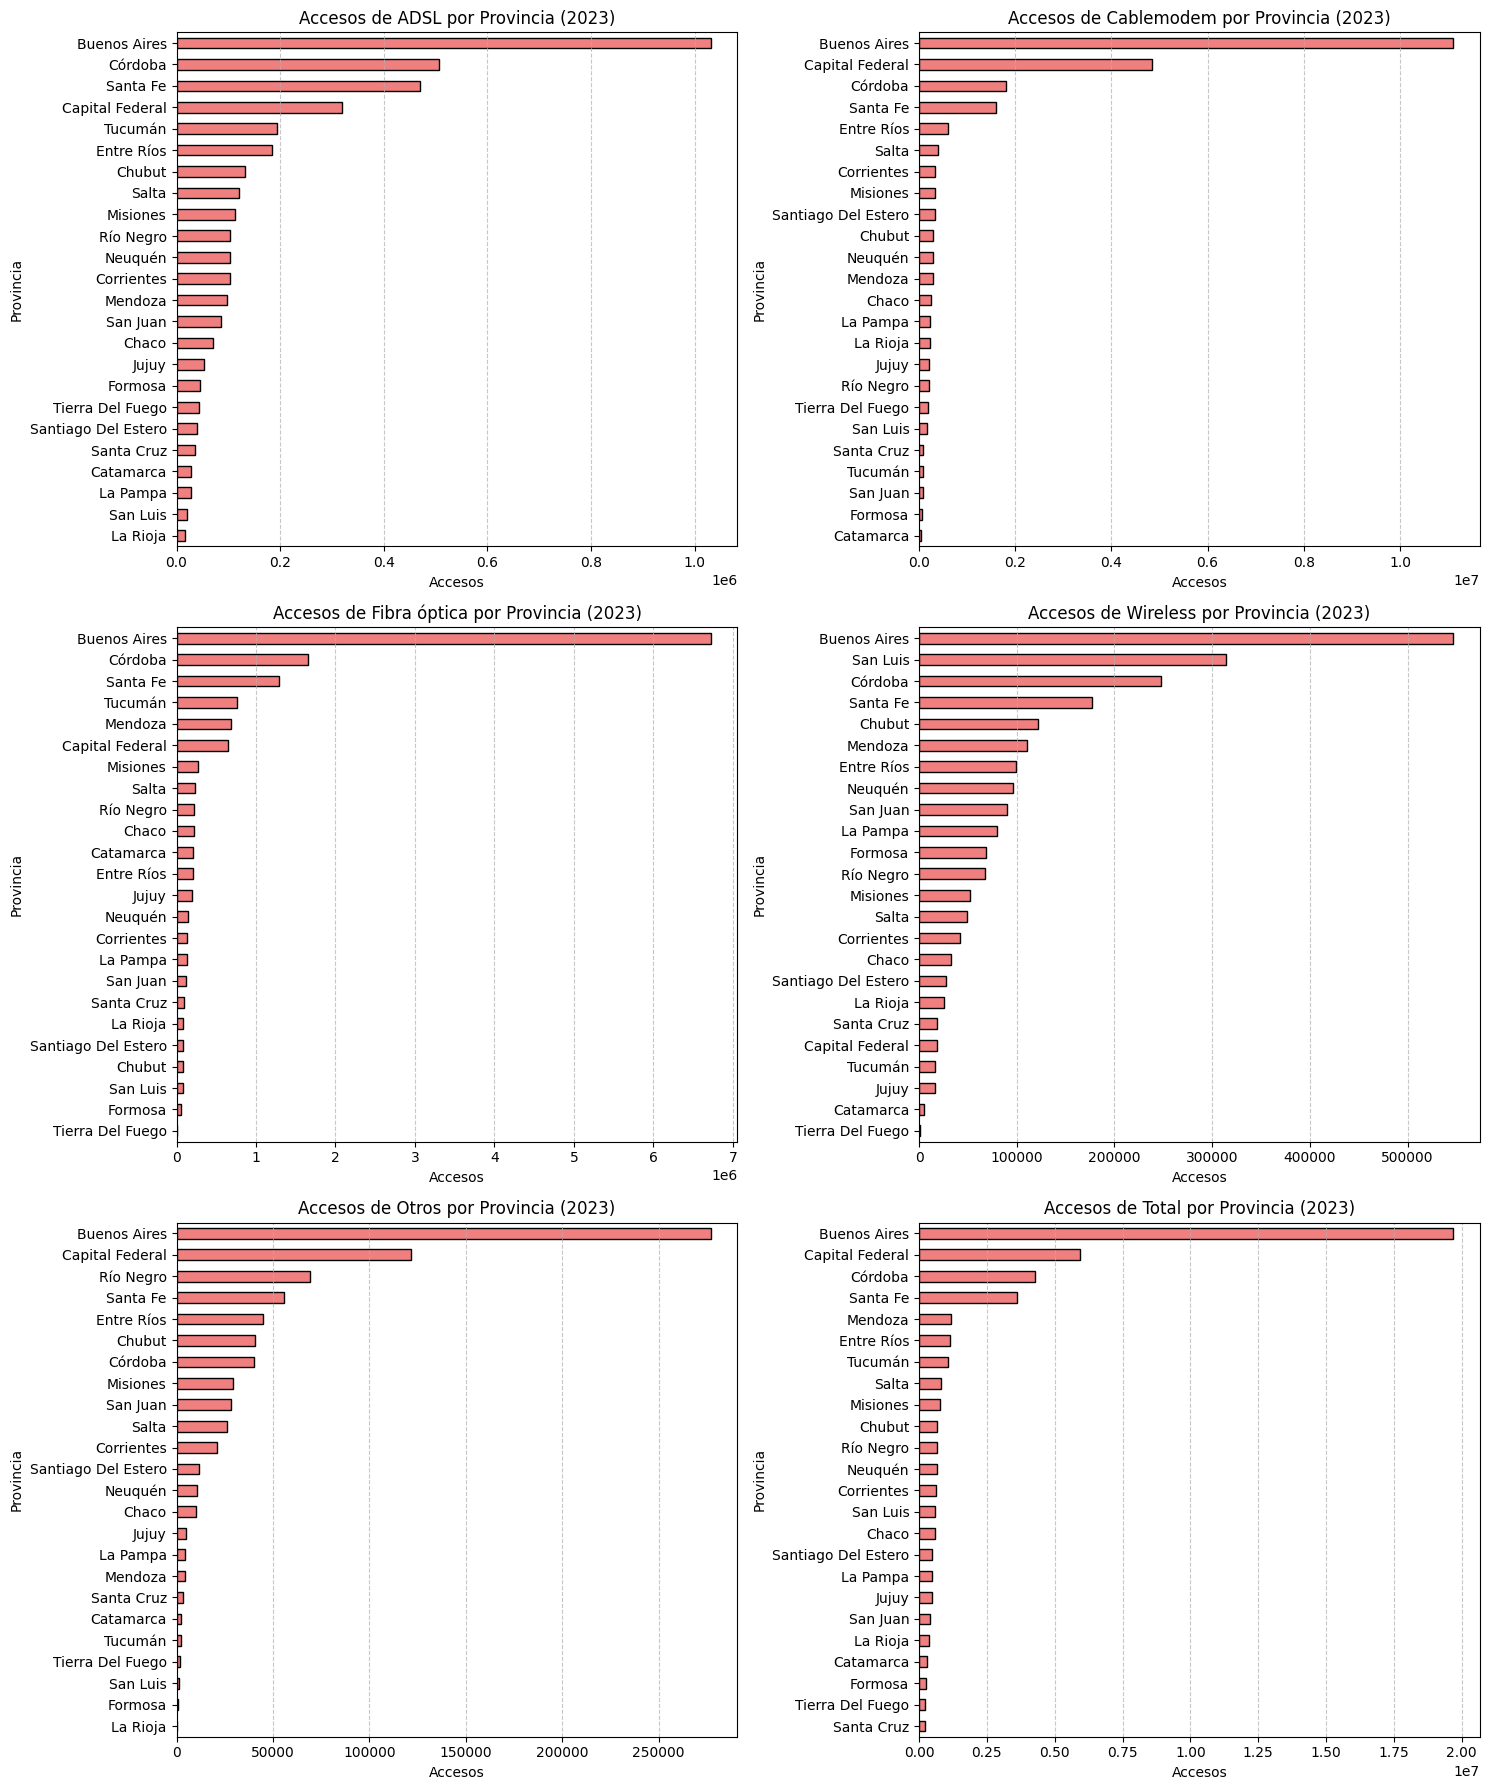

In [36]:
# Llamar a la función 
analizar_acceso_tecnologia_por_provincia(df2)

Hallazgos:
- Accesos de ADSL por Provincia:
La provincia de Buenos Aires tiene la mayor cantidad de accesos a ADSL, seguida por Córdoba, Santa Fe, y la Capital Federal.
Provincias como Formosa, La Pampa, San Luis, y La Rioja muestran un nivel muy bajo de accesos a ADSL, reflejando posibles disparidades en el acceso a esta tecnología.

- Accesos de Cablemodem por Provincia:
Buenos Aires lidera también el acceso a internet por Cablemodem, con una gran diferencia respecto a las demás provincias.
Provincias como Chaco, Santiago del Estero y San Luis muestran un acceso mucho menor.

- Accesos de Fibra Óptica por Provincia:
Buenos Aires se destaca por un gran número de accesos a fibra óptica, siendo la tecnología con un crecimiento potencial debido a sus capacidades de alta velocidad.
Córdoba, Santa Fe, y Tucumán muestran accesos notables, pero aún están lejos de alcanzar a Buenos Aires.
Muchas provincias tienen niveles relativamente bajos de acceso a fibra óptica, reflejando potenciales oportunidades de expansión.

- Accesos de Wireless por Provincia:
La conexión inalámbrica muestra una tendencia diferente, con Buenos Aires, San Luis, y Córdoba destacando en acceso.
Esto puede indicar áreas donde el acceso mediante tecnologías alámbricas puede ser más limitado, y donde las soluciones inalámbricas están más extendidas.

- Accesos de Otros por Provincia:
En esta categoría, Buenos Aires y la Capital Federal destacan.
Es posible que estos "otros" accesos incluyan tecnologías menos convencionales o híbridas.

- Accesos Totales por Provincia:
Buenos Aires lidera de forma abrumadora en accesos totales a internet.
Provincias como Córdoba, Santa Fe y la Capital Federal tienen una notable cantidad de accesos totales, mientras que provincias más pequeñas muestran una menor adopción de tecnologías de conexión.

**Conclusión:** 
- El acceso a internet está muy concentrado en las provincias más grandes y urbanizadas, como Buenos Aires, Córdoba, y Santa Fe; evidenciando la existencia de brechas digitales en Argentina. 
- Buenos Aires concentra la mayor parte de las conexiones, especialmente en tecnologías de alta velocidad como la fibra óptica. Provincias como Córdoba, Santa Fe y Tucumán siguen a la capital, pero con una diferencia significativa. En contraste, provincias como Formosa, La Pampa, San Luis y La Rioja presentan un acceso limitado, lo que refleja una desigualdad en las oportunidades de conectividad.

- La evolución de las tecnologías de acceso a internet en Argentina muestra una clara concentración en las grandes ciudades. Buenos Aires lidera en todas las tecnologías, seguida por Capital Federal, Córdoba y Santa Fe. La fibra óptica, como tecnología de última generación, está experimentando un crecimiento acelerado, principalmente en estos centros urbanos. Sin embargo, muchas provincias del país aún dependen de tecnologías más antiguas y con menor capacidad, lo que limita el acceso a servicios digitales de alta calidad.

- El acceso a internet en Argentina ofrece oportunidades. Si bien las grandes ciudades cuentan con una conectividad robusta, existe un potencial de crecimiento significativo en el resto del país. La expansión de la fibra óptica y el despliegue de tecnologías inalámbricas de alta velocidad son clave para reducir la brecha digital.

### 4.3 Hoja 8: 'Penetración-poblacion'

Penetración de internet en la población.

Pregunta guía para el análisis: ¿Cuál es el porcentaje de Población u Hogares con acceso a internet en cada provincia?

Cargamos los datos en un df3

In [37]:
df3 = pd.read_excel(ruta_archivo, sheet_name='Penetración-poblacion')

df3.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hab
0,2024,2,Buenos Aires,27.43
1,2024,2,Capital Federal,47.44
2,2024,2,Catamarca,17.50
3,2024,2,Chaco,11.78
4,2024,2,Chubut,26.46


In [38]:
# Observamos la información de los datos 
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Año                       1000 non-null   int64  
 1   Trimestre                 1000 non-null   int64  
 2   Provincia                 1000 non-null   object 
 3   Accesos por cada 100 hab  1000 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 31.4+ KB


Manejo de datos no nulos

In [39]:
df3.isnull().sum()# No se encontraron datos nulos

Año                         0
Trimestre                   0
Provincia                   0
Accesos por cada 100 hab    0
dtype: int64

In [40]:
# Verificar duplicados
print(f"Número de filas duplicadas: {df3.duplicated().sum()}")


Número de filas duplicadas: 0


In [41]:
# Obtener lista de nombres únicos de provincias
print(df3['Provincia'].unique()) # Se observa que existen 24 provincias únicas, no requiere transformaciones

['Buenos Aires' 'Capital Federal' 'Catamarca' 'Chaco' 'Chubut' 'Córdoba'
 'Corrientes' 'Entre Ríos' 'Formosa' 'Jujuy' 'La Pampa' 'La Rioja'
 'Mendoza' 'Misiones' 'Neuquén' 'Río Negro' 'Salta' 'San Juan' 'San Luis'
 'Santa Cruz' 'Santa Fe' 'Santiago Del Estero' 'Tierra Del Fuego'
 'Tucumán']


Análisis de la penetración de acceso a Internet en la población

In [42]:
df3.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hab
0,2024,2,Buenos Aires,27.43
1,2024,2,Capital Federal,47.44
2,2024,2,Catamarca,17.50
3,2024,2,Chaco,11.78
4,2024,2,Chubut,26.46


In [43]:
# Calcular la mediana de los accesos por cada 100 habitantes
mediana_accesos = df3['Accesos por cada 100 hab'].median()

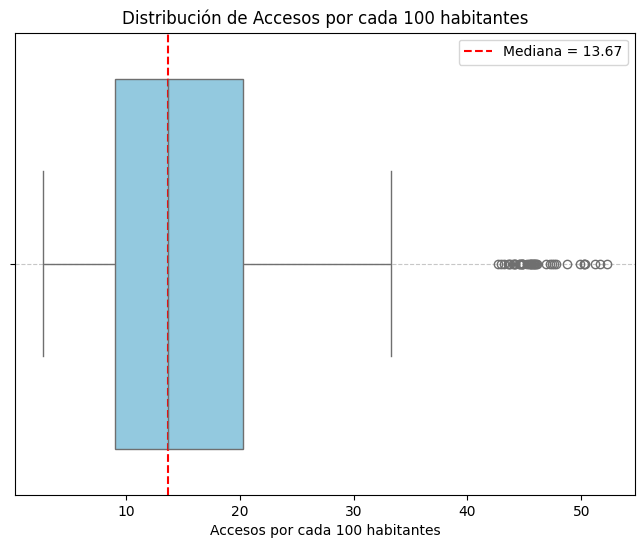

In [44]:
# Observamos la distribución de datos de acceso a internet por cada 100 habitantes
plt.figure(figsize=(8, 6))
sns.boxplot(data=df3, x='Accesos por cada 100 hab', color='skyblue')

# Dibujar una línea que representa la mediana
plt.axvline(x=mediana_accesos, color='red', linestyle='--', label=f'Mediana = {mediana_accesos:.2f}')

# Etiquetas y título
plt.xlabel('Accesos por cada 100 habitantes')
plt.title('Distribución de Accesos por cada 100 habitantes')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Interpretación:
 
Los datos de penetración de accesos a internet por cada 100 habitantes tiene una mediana de 13.67. Esto significa que la mitad de las observaciones tienen menos de 13.67 accesos y la otra mitad tiene más. Asimismo, la caja es relativamente estrecha, lo que indica que la mayoría de los datos están concentrados alrededor de la mediana. Sin embargo, hay una cantidad significativa de outliers hacia la derecha, lo que sugiere que algunas provincias tienen un número mucho mayor de accesos.

Análisis de la tendencia de acceso a internet por cada 100 habitantes 

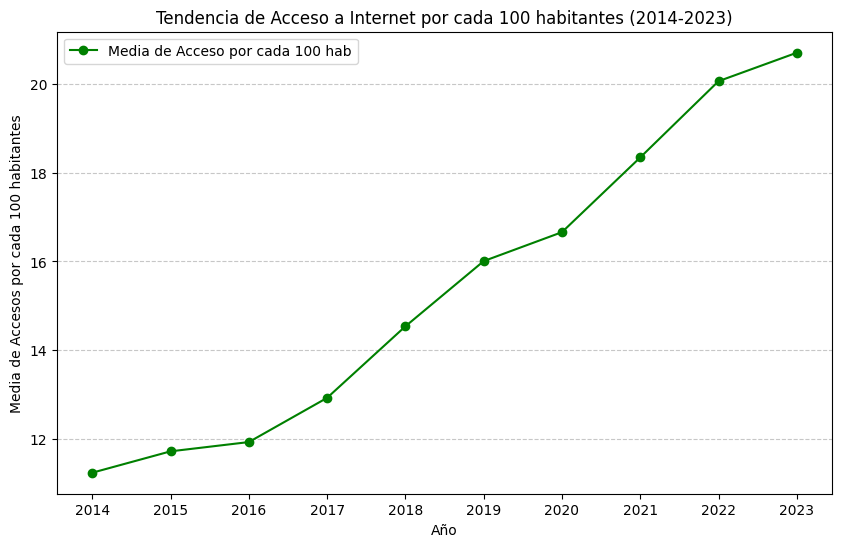

In [45]:
# Filtrar datos para el rango de años 2014 al 2023
df_filtered = df3[(df3['Año'] >= 2014) & (df3['Año'] <= 2023)]

# Calcular la media de accesos por cada 100 habitantes por año
mean_anual = df_filtered.groupby('Año')['Accesos por cada 100 hab'].mean()
# Crear el gráfico de línea para mostrar la tendencia
plt.figure(figsize=(10, 6))
plt.plot(mean_anual.index, mean_anual.values, marker='o', linestyle='-', color='g', label='Media de Acceso por cada 100 hab')

# Etiquetas y título
plt.xlabel('Año')
plt.ylabel('Media de Accesos por cada 100 habitantes')
plt.title('Tendencia de Acceso a Internet por cada 100 habitantes (2014-2023)')
plt.xticks(mean_anual.index)  # Mostrar todos los años en el eje x
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()


Interpretación:

El gráfico muestra una tendencia al alza clara y sostenida en el acceso a internet por cada 100 habitantes a lo largo del período 2014-2023. Esta tendencia indica un aumento generalizado en la conectividad a nivel poblacional, lo cual es un reflejo de los avances tecnológicos y de la creciente importancia de internet en la vida cotidiana. Sin embargo, no todas las provincias están experimentando este crecimiento al mismo ritmo. Además el gráfico refleja un crecimiento acelerado a partir del 2018 en adelante.

Observamos la media y mediana para determinar una medida de comparación

In [46]:
# Calcular la mediana de los accesos por cada 100 habitantes
mediana_accesos = df3['Accesos por cada 100 hab'].median()
print(f"La mediana de los accesos por cada 100 habitantes es: {mediana_accesos}")
# Calcular la media de los accesos por cada 100 habitantes
mean_accesos = df3['Accesos por cada 100 hab'].mean()
print(f"La media de los accesos por cada 100 habitantes es: {mean_accesos}")

La mediana de los accesos por cada 100 habitantes es: 13.6748115585677
La media de los accesos por cada 100 habitantes es: 15.727247506469322


Para realizar el análisis utilizaremos la mediana por cada 100 habitantes por provincia, como medida de comparación, a fin de observar el nivel de acceso general por provincia.

In [47]:
# Calcular la media de accesos por cada 100 habitantes por provincia
provincia_median_accesos = df3.groupby('Provincia')['Accesos por cada 100 hab'].median().sort_values(ascending=False)

# Mostrar las primeras 5 provincias para ver si hay diferencias significativas
provincia_median_accesos.head()

Provincia
Capital Federal     45.586471
La Pampa            25.018667
Tierra Del Fuego    22.771515
San Luis            21.441353
Santa Fe            21.201130
Name: Accesos por cada 100 hab, dtype: float64

Para visualizar la mediana de acceso por provincia creamos un gráfico de barras, a fin de visualizar las diferencias entre provincias

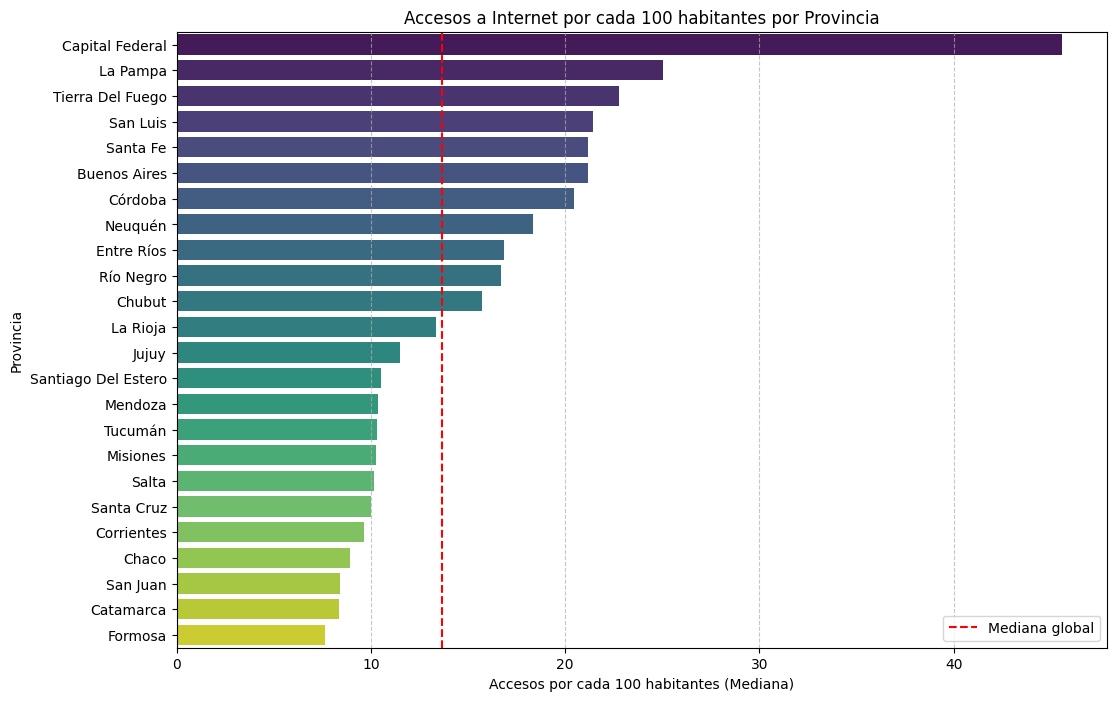

In [48]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Crear un gráfico de barras
sns.barplot(x=provincia_median_accesos.values, y=provincia_median_accesos.index, palette='viridis')

# Etiquetas y título
plt.xlabel('Accesos por cada 100 habitantes (Mediana)')
plt.ylabel('Provincia')
plt.title('Accesos a Internet por cada 100 habitantes por Provincia')
plt.axvline(mediana_accesos, color='red', linestyle='--', label='Mediana global')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

Interpretación:

- Se observa una gran disparidad en el acceso a internet entre las diferentes provincias. Las provincias ubicadas en la parte superior del gráfico (Capital Federal, La Pampa, Tierra del Fuego) tienen un acceso a internet significativamente mayor en comparación con las provincias ubicadas en la parte inferior (Formosa, Catamarca, San Juan).
-  La mitad de las provincias tienen un acceso a internet por debajo de la mediana y la otra mitad por encima de está.

Conclusiones:
- La clara diferencia en los niveles de acceso a internet entre las diferentes provincias indica una brecha digital significativa. Esto sugiere que las oportunidades de acceso a la información, educación y servicios en línea no son equitativas para todos los ciudadanos de Argentina.

Analizamos la evolución del acceso en el tiempo por provincia:
- Para ello creamos un gráfico de líneas para observar cómo ha cambiado el acceso en el tiempo en las provincias con los mayores niveles de acceso

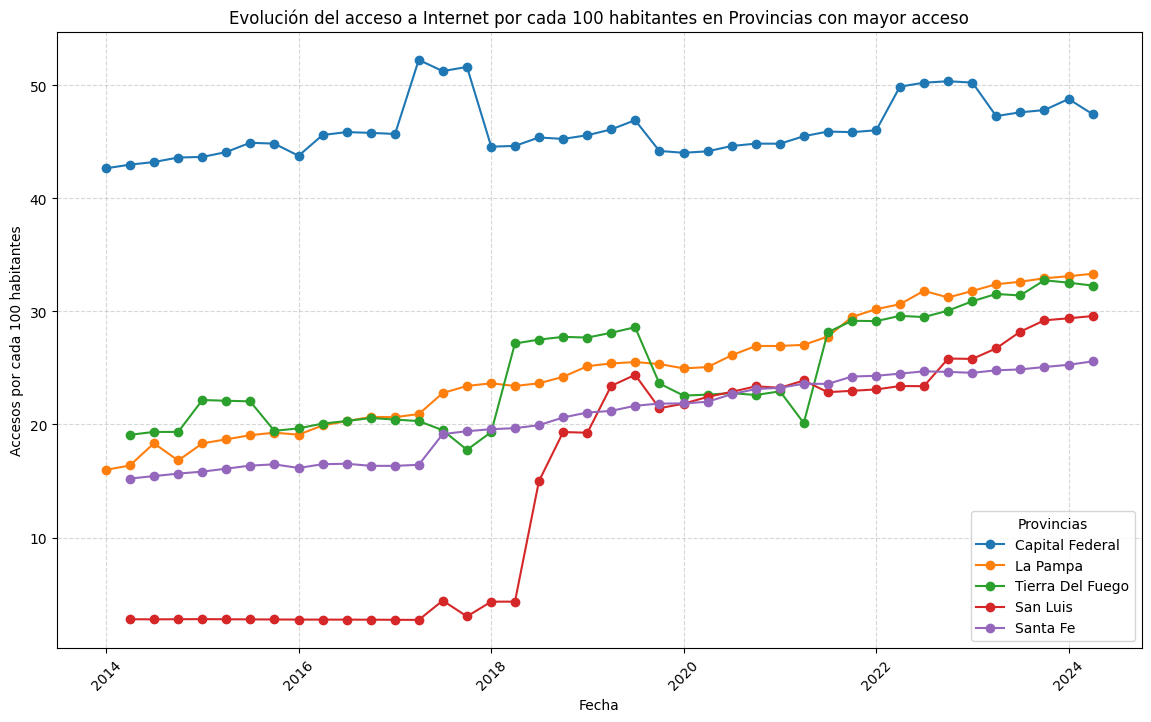

In [49]:
# Seleccionamos las 5 provincias con mayor acceso 
top_provincias = provincia_median_accesos.head(5).index

# Filtrar el dataframe para estas provincias
df_top_provincias = df3[df3['Provincia'].isin(top_provincias)]

# Creamos un gráfico de líneas para mostrar la tendencia de acceso por trimestre y año
plt.figure(figsize=(14, 8))
for provincia in top_provincias:
    data_provincia = df_top_provincias[df_top_provincias['Provincia'] == provincia]
    # Crear una columna de fecha combinando año y trimestre
    data_provincia['Fecha'] = data_provincia['Año'].astype(str) + '-Q' + data_provincia['Trimestre'].astype(str)
    data_provincia['Fecha'] = pd.to_datetime(data_provincia['Fecha']).dt.to_period('Q').dt.to_timestamp()
    
    # Graficamos la tendencia
    plt.plot(data_provincia['Fecha'], data_provincia['Accesos por cada 100 hab'], marker='o', label=provincia)

# Configurar etiquetas y título
plt.xlabel('Fecha')
plt.ylabel('Accesos por cada 100 habitantes')
plt.title('Evolución del acceso a Internet por cada 100 habitantes en Provincias con mayor acceso')
plt.xticks(rotation=45)
plt.legend(title='Provincias')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Interpretación:
- Todas las provincias muestran una tendencia creciente en el acceso a internet a lo largo del período analizado. Esto indica una expansión gradual de la conectividad en todo el país.
- A pesar de la tendencia al alza, se observan claras desigualdades entre las provincias. La Capital Federal y La Pampa mantienen los niveles más altos de acceso a internet, mientras que San Luis y Santa Fe presentan tasas de crecimiento más moderadas. Tierra del Fuego muestra una evolución más volátil.
- Las provincias no experimentan el mismo ritmo de crecimiento. Algunas, como la Capital Federal, muestran un crecimiento más sostenido, mientras que otras presentan variaciones más pronunciadas a lo largo del tiempo.

Conclusión:

El gráfico muestra una tendencia positiva hacia una mayor penetración de internet en las 5 provincias argentinas, pero también evidencia importantes desigualdades provinciales.

- También creamos un gráfico de líneas para observar cómo ha cambiado el aceeso en el tiempo en las provincias con los menores niveles de acceso

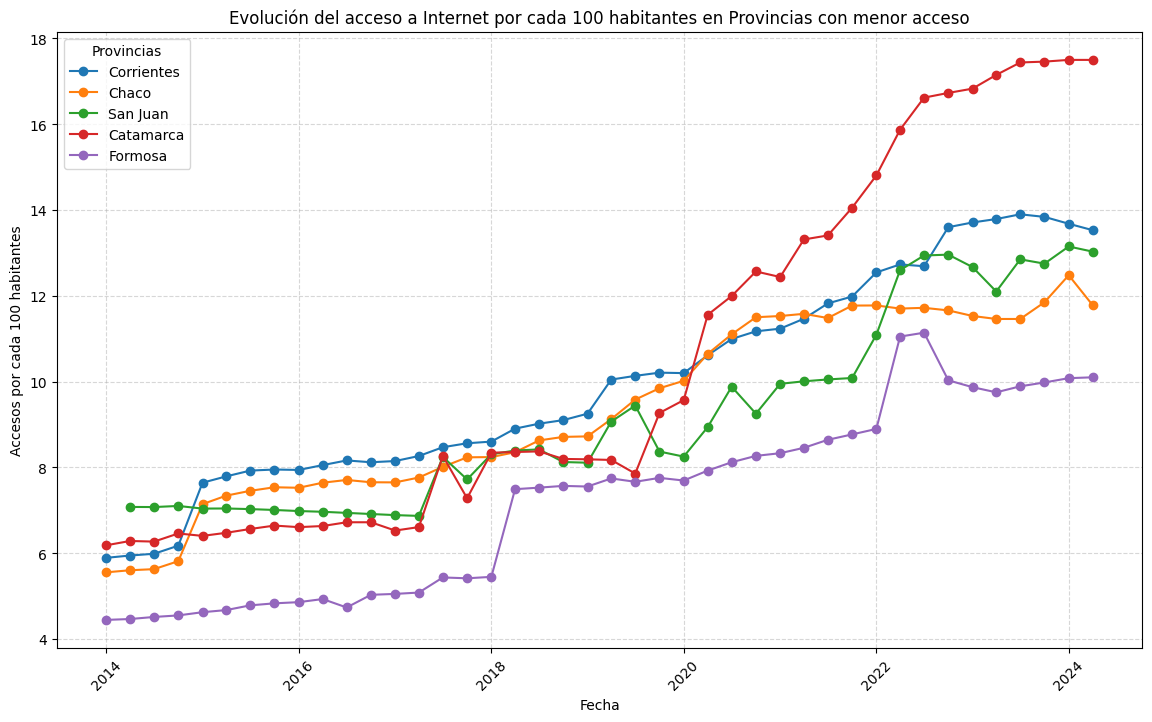

In [50]:
# Seleccionamos las 5 provincias con menor acceso 
menor_provincias = provincia_median_accesos.tail(5).index

# Filtrar el dataframe para estas provincias
df_menor_provincias = df3[df3['Provincia'].isin(menor_provincias)]

# Crear un gráfico de líneas para mostrar la tendencia de acceso por trimestre y año
plt.figure(figsize=(14, 8))
for provincia in menor_provincias:
    data_provincia = df_menor_provincias[df_menor_provincias['Provincia'] == provincia]
    # Crear una columna de fecha combinando año y trimestre
    data_provincia['Fecha'] = data_provincia['Año'].astype(str) + '-Q' + data_provincia['Trimestre'].astype(str)
    data_provincia['Fecha'] = pd.to_datetime(data_provincia['Fecha']).dt.to_period('Q').dt.to_timestamp()
    
    # Graficar la tendencia
    plt.plot(data_provincia['Fecha'], data_provincia['Accesos por cada 100 hab'], marker='o', label=provincia)

# Configurar etiquetas y título
plt.xlabel('Fecha')
plt.ylabel('Accesos por cada 100 habitantes')
plt.title('Evolución del acceso a Internet por cada 100 habitantes en Provincias con menor acceso')
plt.xticks(rotation=45)
plt.legend(title='Provincias')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Interpretación:
- Al igual que en las provincias con mayor acceso, se observa una tendencia general creciente en la penetración de internet en estas cinco provincias a lo largo del período analizado. Esto indica un esfuerzo por reducir la brecha digital en todo el país.
- El ritmo de crecimiento en estas provincias es significativamente más lento en comparación con las provincias con mayor acceso. Esto sugiere que persisten barreras que dificultan la expansión de los servicios de internet en estas regiones.
- Las cinco provincias muestran trayectorias de crecimiento ligeramente diferentes. Algunas, como Corrientes y Chaco, presentan una evolución más estable, mientras que otras, como Catamarca, muestran fluctuaciones más pronunciadas.
- Los niveles iniciales de acceso a internet en estas provincias son considerablemente más bajos en comparación con las provincias con mayor conectividad, lo que refleja una brecha digital histórica.

Identificamos las provincias con menor acceso relativo 

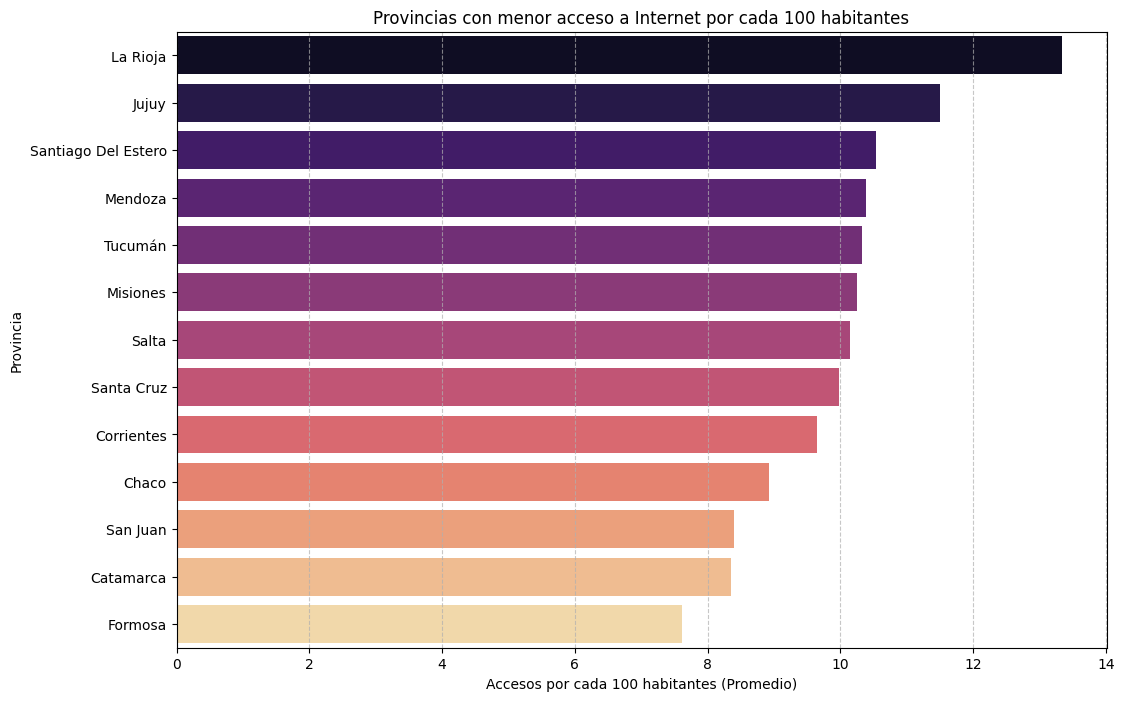

In [51]:
# Calcular la mediana total
median_total = df3['Accesos por cada 100 hab'].median()

# Provincias con accesos por debajo de la mediana total
provincias_oportunidad = provincia_median_accesos[provincia_median_accesos < median_total]

# Creamos un gráfico de las provincias con menor penetración
plt.figure(figsize=(12, 8))
sns.barplot(x=provincias_oportunidad.values, y=provincias_oportunidad.index, palette='magma')

plt.xlabel('Accesos por cada 100 habitantes (Promedio)')
plt.ylabel('Provincia')
plt.title('Provincias con menor acceso a Internet por cada 100 habitantes')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Interpretación:

El gráfico todas las provincias que tienen un nivel de penetración de acceso a internet por cada 100 habitante menor a la medida de comparación nacional, que va desde La Rioja con el menor acceso hasta Formosa con un acceso ligeramente superior. Asimismo, estas provincias también podrían representar una oportunidad de negocio. 

### 4.4 Hoja 9: 'Penetracion-hogares'

Penetración de internet en hogares.

In [52]:
df4 = pd.read_excel(ruta_archivo, sheet_name='Penetracion-hogares')

df4.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2024,2,Buenos Aires,79.84
1,2024,2,Capital Federal,116.37
2,2024,2,Catamarca,68.81
3,2024,2,Chaco,44.06
4,2024,2,Chubut,86.33


In [53]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           1000 non-null   int64  
 1   Trimestre                     1000 non-null   int64  
 2   Provincia                     1000 non-null   object 
 3   Accesos por cada 100 hogares  1000 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 31.4+ KB


Tratamiento de valores nulos y duplicados

In [54]:
df4.isnull().sum()# No se encontraron datos nulos

Año                             0
Trimestre                       0
Provincia                       0
Accesos por cada 100 hogares    0
dtype: int64

In [55]:
# Verificar duplicados
print(f"Número de filas duplicadas: {df4.duplicated().sum()}")


Número de filas duplicadas: 0


In [56]:
# Obtener lista de nombres únicos de provincias
print(df4['Provincia'].unique()) # Se observa que existen 24 provincias únicas, no requiere transformaciones


['Buenos Aires' 'Capital Federal' 'Catamarca' 'Chaco' 'Chubut' 'Córdoba'
 'Corrientes' 'Entre Ríos' 'Formosa' 'Jujuy' 'La Pampa' 'La Rioja'
 'Mendoza' 'Misiones' 'Neuquén' 'Río Negro' 'Salta' 'San Juan' 'San Luis'
 'Santa Cruz' 'Santa Fe' 'Santiago Del Estero' 'Tierra Del Fuego'
 'Tucumán']


Análisis de la penetración de acceso a Internet en Hogares

In [57]:
# Calcular la mediana de los accesos por cada 100 hogares
mediana_accesos = df4['Accesos por cada 100 hogares'].median()

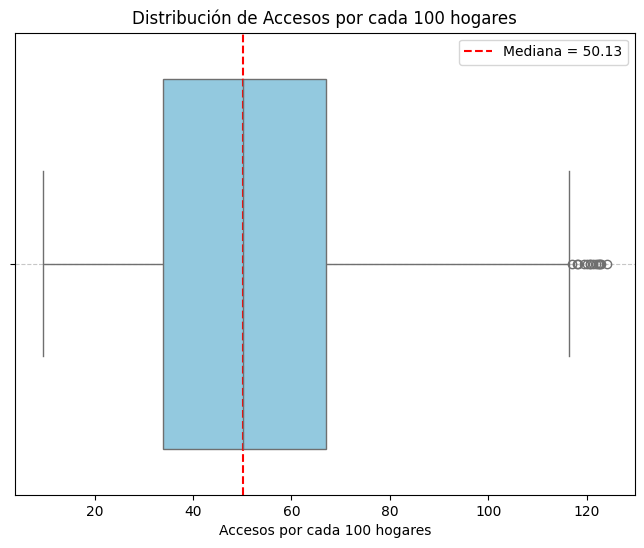

In [58]:
# Creamos gráfico de caja
plt.figure(figsize=(8, 6))
sns.boxplot(data=df4, x='Accesos por cada 100 hogares', color='skyblue')

# Dibujar una línea que representa la mediana
plt.axvline(x=mediana_accesos, color='red', linestyle='--', label=f'Mediana = {mediana_accesos:.2f}')

# Etiquetas y título
plt.xlabel('Accesos por cada 100 hogares')
plt.title('Distribución de Accesos por cada 100 hogares')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Interpretación:
 
Los datos de penetración de accesos a internet por cada 100 hogares tiene una mediana de 50.13. Esto significa que la mitad de los hogares tienen menos de 50.13 accesos y la otra mitad tiene más. Asimismo, las mediana de 50.13 accesos por cada 100 hogares indica una alta penetración de internet en Argentina. Esto significa que, en promedio, más de la mitad de los hogares en cada provincia tiene acceso a internet.

Por otro lado, hay una cantidad significativa de outliers hacia la derecha, lo que sugiere que algunas provincias tienen una penetración de intenet mucho mayor que el promedio, esto sugiere que existen desigualdades en el acceso a internet entre diferentes provincias de Argentina.



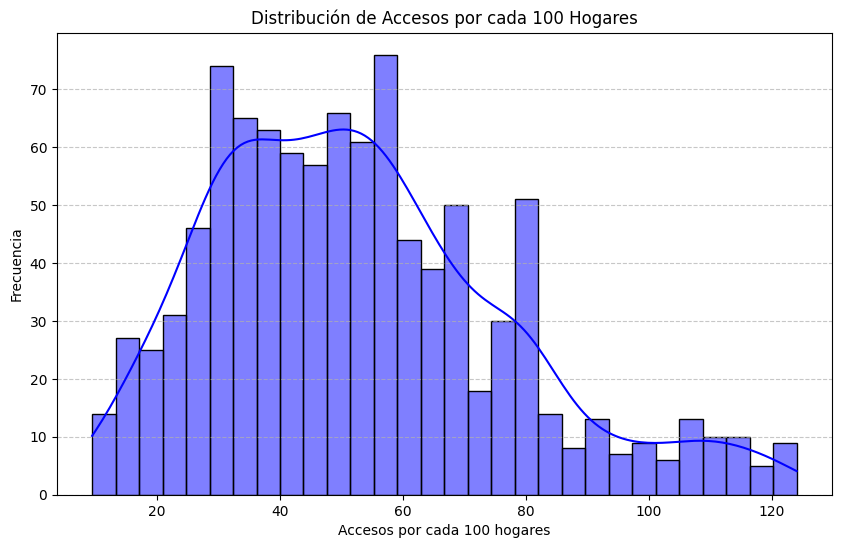

In [59]:
# Histograma de Accesos por cada 100 hogares
plt.figure(figsize=(10, 6))
sns.histplot(df4['Accesos por cada 100 hogares'], bins=30, kde=True, color='blue')
plt.xlabel('Accesos por cada 100 hogares')
plt.ylabel('Frecuencia')
plt.title('Distribución de Accesos por cada 100 Hogares')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Interpretación:
- El histograma confirma la alta pentración de internet en los hogares de Argentina, con una concentración en valores por encima del 20%
- La dispersión de los datos indica que existen diferencias significativas en la pentración de internet entre las distintas provincias del país.

Observamos la media y mediana para determinar una medida de comparación

In [60]:
# Calcular la mediana de los accesos por cada 100 hogares
mediana_accesos = df4['Accesos por cada 100 hogares'].median()
print(f"La mediana de los accesos por cada 100 hogares es: {mediana_accesos}")
# Calcular la media de los accesos por cada 100 hogares
mean_accesos = df4['Accesos por cada 100 hogares'].mean()
print(f"La media de los accesos por cada 100 hogares es: {mean_accesos}")


La mediana de los accesos por cada 100 hogares es: 50.13300393013305
La media de los accesos por cada 100 hogares es: 52.794973016863175


Para realizar el análisis utilizaremos la mediana por cada 100 hogares por provincia, como medida de comparación, a fin de observar el nivel de acceso general por provincia.

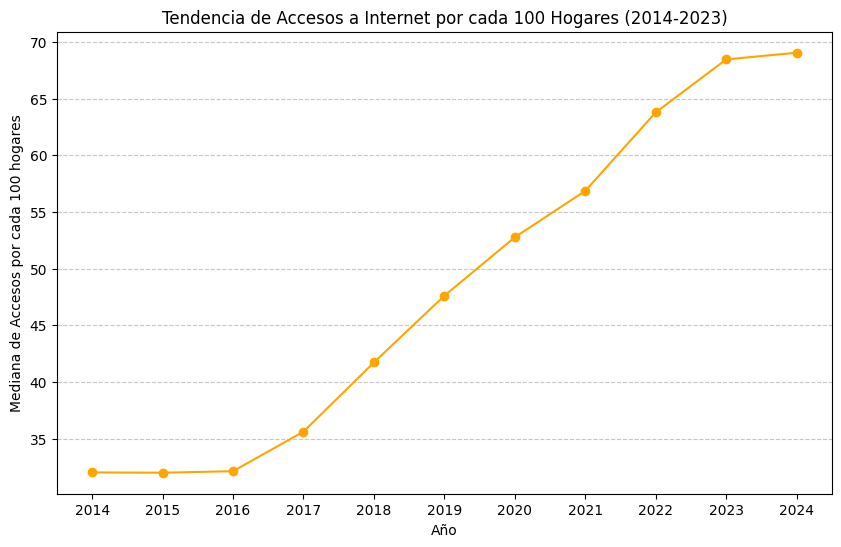

In [61]:
# Calcular la mediana de accesos por cada 100 hogares por año
mediana_anual = df4.groupby('Año')['Accesos por cada 100 hogares'].median().reset_index()

# Gráfico de tendencia
plt.figure(figsize=(10, 6))
plt.plot(mediana_anual['Año'], mediana_anual['Accesos por cada 100 hogares'], marker='o', linestyle='-', color='orange')
plt.xlabel('Año')
plt.ylabel('Mediana de Accesos por cada 100 hogares')
plt.title('Tendencia de Accesos a Internet por cada 100 Hogares (2014-2023)')
plt.xticks(mediana_anual['Año'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Interpretación: 

En el gráfico se observa una aceleración en el crecimiento de la penetración de internet, especialmente en los últimos años. Esto podría deberse a diversos factores como la mejora de la infraestructura de telecomunicaciones, la disminución de los costos de los servicios de internet, y el aumento de la demanda impulsado por factores como la pandemia de COVID-19 que aceleró la digitalización de muchos aspectos de la vida. Además sugiere que cada vez más hogares argentinos están adquiriendo acceso a internet.

In [62]:
# Calcular la media de accesos por cada 100 habitantes por provincia
provincia_median_accesos = df4.groupby('Provincia')['Accesos por cada 100 hogares'].median().sort_values(ascending=False)

# Mostrar las primeras 5 provincias para ver si hay diferencias significativas
provincia_median_accesos.head()

Provincia
Capital Federal     114.348639
Tierra Del Fuego     76.809096
La Pampa             75.934185
San Luis             74.920026
Santa Fe             67.422920
Name: Accesos por cada 100 hogares, dtype: float64

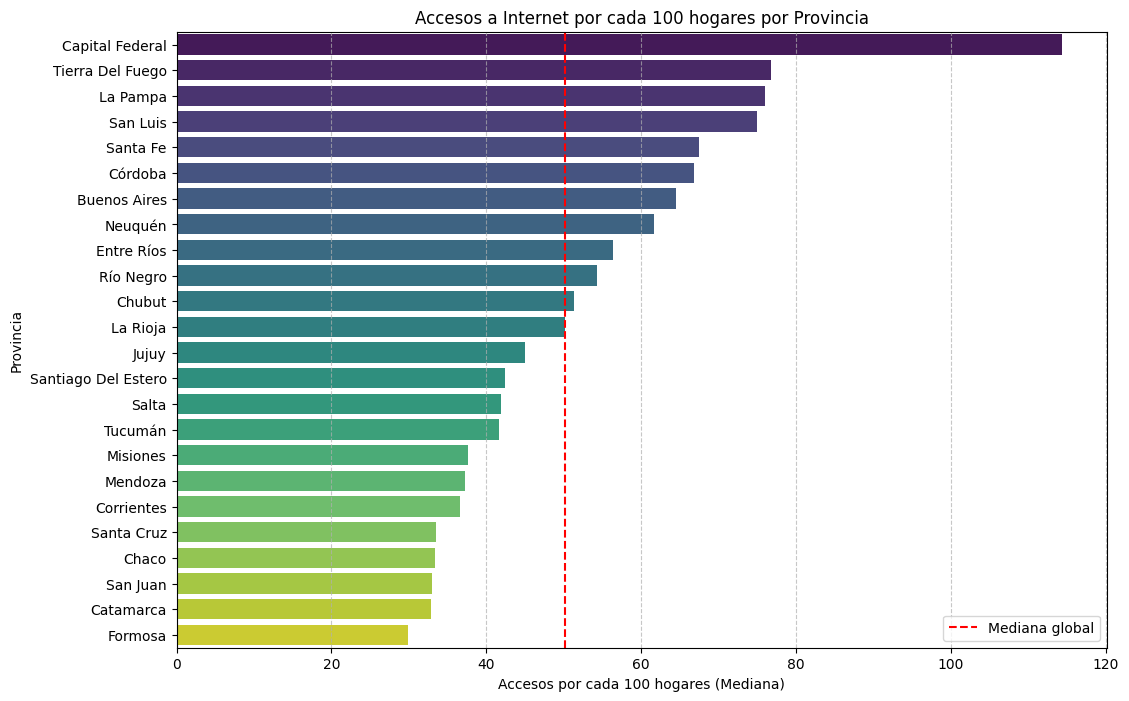

In [63]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Crear un gráfico de barras
sns.barplot(x=provincia_median_accesos.values, y=provincia_median_accesos.index, palette='viridis')

# Etiquetas y título
plt.xlabel('Accesos por cada 100 hogares (Mediana)')
plt.ylabel('Provincia')
plt.title('Accesos a Internet por cada 100 hogares por Provincia')
plt.axvline(mediana_accesos, color='r', linestyle='--', label='Mediana global')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

Interpretación:

- Se observa una gran disparidad en la penetración de acceso a internet entre las diferentes provincias. Las provincias ubicadas en la parte superior del gráfico (Capital Federal, Tierra del Fuego, La Pampa) tienen un acceso a internet significativamente mayor en comparación con las provincias ubicadas en la parte inferior (Formosa, Catamarca, San Juan).
- Provincias como Entre Ríos, Río Negro y Chubut se encuentran cerca de la mediana global, indicando un nivel de acceso a Internet alrededor del promedio nacional.

Conclusión:

La clara diferencia en los niveles de acceso a internet entre las diferentes provincias indica una brecha digital significativa. Esto sugiere que las áreas urbanas o con mejor desarrollo económico tienden a tener una mayor penetración de Internet, mientras que las provincias con menos recursos o más rurales están por debajo de la mediana nacional. Esto puede representar una oportunidad para que los proveedores de servicios de Internet expandan o mejoren la infraestructura en áreas menos atendidas, buscando reducir la brecha digital.


Analizamos la evolución de la penetración del acceso a intenert por cada 100 hogares en el tiempo por provincia:
- Para ello creamos un gráfico de líneas para observar cómo ha cambiado el acceso en el tiempo en las provincias con los mayores niveles de acceso

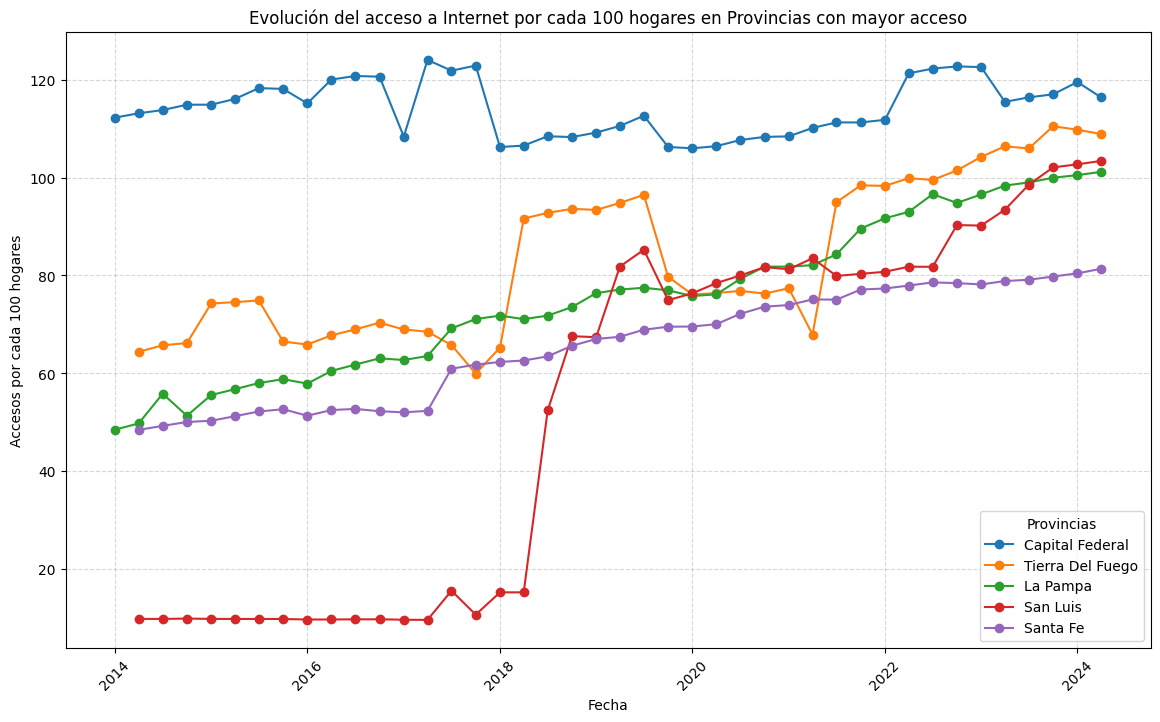

In [64]:
# Seleccionamos las 5 provincias con menor acceso 
top_provincias = provincia_median_accesos.head(5).index
# Filtrar el dataframe para provincias con mayor acceso a internet

df_top_provincias = df4[df4['Provincia'].isin(top_provincias)]

# Creamos un gráfico de líneas para mostrar la tendencia de acceso por trimestre y año
plt.figure(figsize=(14, 8))
for provincia in top_provincias:
    data_provincia = df_top_provincias[df_top_provincias['Provincia'] == provincia]
    # Crear una columna de fecha combinando año y trimestre
    data_provincia['Fecha'] = data_provincia['Año'].astype(str) + '-Q' + data_provincia['Trimestre'].astype(str)
    data_provincia['Fecha'] = pd.to_datetime(data_provincia['Fecha']).dt.to_period('Q').dt.to_timestamp()
    
    # Graficamos la tendencia
    plt.plot(data_provincia['Fecha'], data_provincia['Accesos por cada 100 hogares'], marker='o', label=provincia)

# Configurar etiquetas y título
plt.xlabel('Fecha')
plt.ylabel('Accesos por cada 100 hogares')
plt.title('Evolución del acceso a Internet por cada 100 hogares en Provincias con mayor acceso')
plt.xticks(rotation=45)
plt.legend(title='Provincias')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


*Interpretación:*

- Se observa un crecimiento sostenido en el acceso a Internet, que se mantiene consistentemente alto, la Ciudad de Buenos Aires y Tierra del Fuego siempre han tenido los índices de penetración más altos, seguidas por La Pampa, San Luis y Santa Fe. Esto indica una infraestructura madura y un alto nivel de penetración de Internet en la Capital Federal.

- En los últimos años, se observa una aceleración en el crecimiento de la penetración de internet en esta cinco provincias, lo que sugiere un aumento en la demanda y la inversión en infraestructura.

*Conclusión general:*

- Este gráfico destaca cómo algunas provincias han mejorado significativamente su acceso a Internet en los últimos años, posiblemente debido a inversiones en infraestructura y políticas de acceso digital. La Capital Federal se mantiene como la provincia con el mayor acceso a Internet, reflejando una conectividad de alta penetración, mientras que provincias como Tierra del Fuego y San Luis han logrado avances importantes, especialmente en los últimos cinco años. La evolución en el acceso a Internet es más lenta en Santa Fe y La Pampa, aunque también muestra un crecimiento constante.
- Las provincias de Capital Federal y Tierra del Fuego, podrían estar alcanzando un nivel de saturación, lo que implica que las oportunidades de crecimiento en estas regiones podrían ser más limitadas.
- Provincias como La Pampa, San Luis y Santa Fe aún tienen un margen significativo para aumentar la penetración de internet, lo que representa una oportunidad para los proveedores de servicios de internet.

- También creamos un gráfico de líneas para observar cómo ha cambiado el aceeso en el tiempo en las provincias con los menores niveles de acceso

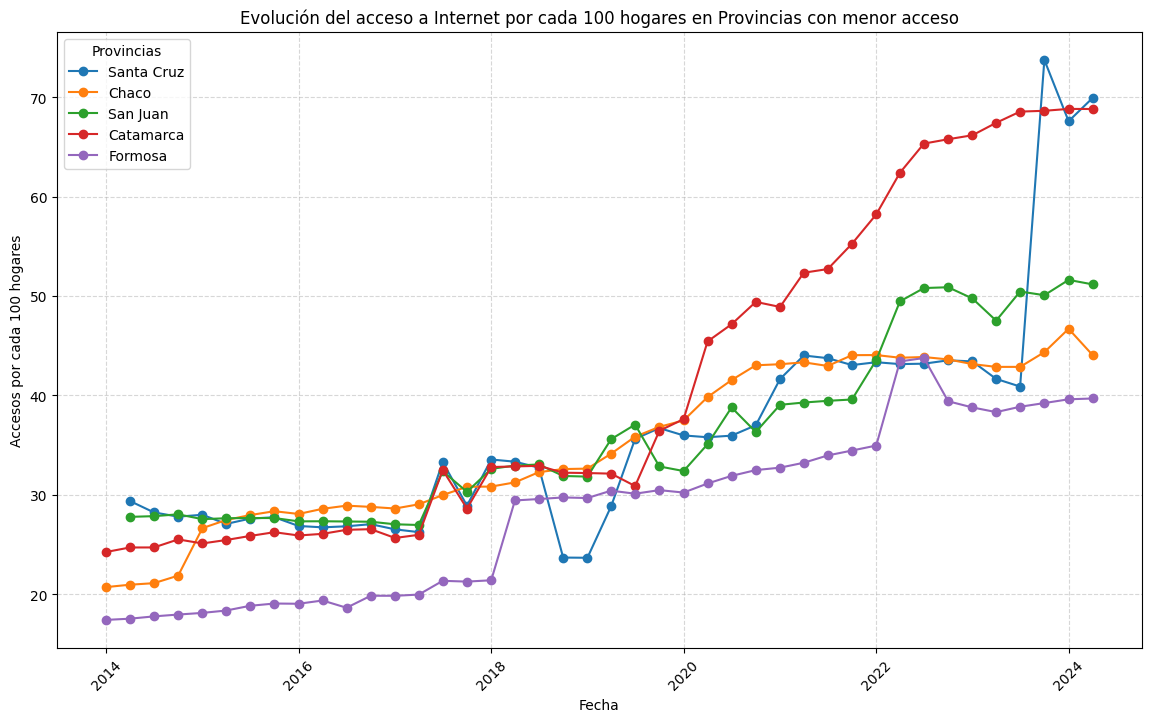

In [65]:
# Seleccionamos las 5 provincias con menor acceso 
menor_provincias = provincia_median_accesos.tail(5).index

# Filtrar el dataframe para estas provincias
df_menor_provincias = df4[df4['Provincia'].isin(menor_provincias)]

# Crear un gráfico de líneas para mostrar la tendencia de acceso por trimestre y año
plt.figure(figsize=(14, 8))
for provincia in menor_provincias:
    data_provincia = df_menor_provincias[df_menor_provincias['Provincia'] == provincia]
    # Crear una columna de fecha combinando año y trimestre
    data_provincia['Fecha'] = data_provincia['Año'].astype(str) + '-Q' + data_provincia['Trimestre'].astype(str)
    data_provincia['Fecha'] = pd.to_datetime(data_provincia['Fecha']).dt.to_period('Q').dt.to_timestamp()
    
    # Graficar la tendencia
    plt.plot(data_provincia['Fecha'], data_provincia['Accesos por cada 100 hogares'], marker='o', label=provincia)

# Configurar etiquetas y título
plt.xlabel('Fecha')
plt.ylabel('Accesos por cada 100 hogares')
plt.title('Evolución del acceso a Internet por cada 100 hogares en Provincias con menor acceso')
plt.xticks(rotation=45)
plt.legend(title='Provincias')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

*Interpretación:*
- La cinco provincias muestran un crecimiento sostenido en la penetración de internet a lo largo de los años anañizados. Esto indica un esfuerzo generalizado por reducir la brecha digital en todo el país.
- Si bien todas las provincias muestran una tendencia al alza, el ritmo de crecimiento varía significativamente entre ellas. Algunas provincias, como Santa Cruz, han experimentado un crecimiento más acelerado en los últimos años, mientras que otras, como Formosa, han mantenido un ritmo más constante.
-  los niveles de penetración de internet en estas provincias siguen siendo considerablemente más bajos en comparación con las provincias más desarrolladas de Argentina.
- También se observan algunas fluctuaciones año a año, lo que podría estar relacionado con factores como cambios en las políticas públicas, crisis económicas o eventos globales que afectan la capacidad de inversión en infraestructura.

*Conclusión:*
- Las provincias con menor acceso representan un mercado con un gran potencial de crecimiento para los proveedores de servicios de internet. Al expandir la infraestructura y ofrecer servicios adaptados a las necesidades de estas regiones, las empresas pueden capturar una demanda potencial.


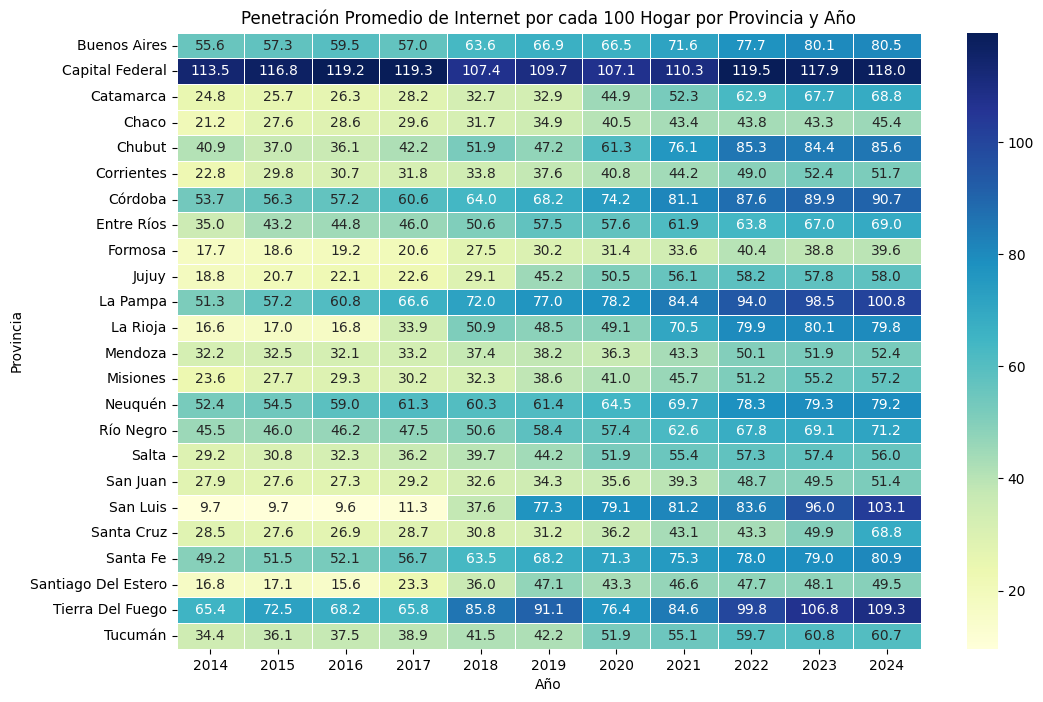

In [66]:
# Agrupar y pivoteo para preparar los datos para el mapa de calor
df_pivot = df4.pivot_table(values='Accesos por cada 100 hogares', index='Provincia', columns='Año', aggfunc='mean')

# Crear el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(df_pivot, annot=True, cmap='YlGnBu', fmt=".1f", linewidths=0.5)
plt.title("Penetración Promedio de Internet por cada 100 Hogar por Provincia y Año")
plt.xlabel("Año")
plt.ylabel("Provincia")
plt.show()

*Interpretación:*
- Se observa una tendencia al alza en la penetración de internet en todas las provincias a lo largo de los años analizados, esto indica un crecimiento sostenido en el acceso a internet en los hogares argentinos.
- Sin embargo, existen diferencias marcadas entre las provincias como, Capital Federal y Tierra del Fuego, que presentan los índices de penetración más altos, mientras que provincias como Formosa y Chaco muestran los índices más bajos. Esta disparidad refleja las desigualdades provinciales en términos de desarrollo económico y acceso a infraestructura.
- En los últimos años, se observa una aceleración en el crecimiento de la penetración de internet en la mayoría de las provincias, lo que sugiere un aumento en la demanda y la inversión en infraestructura.

*Conclusión:*
- El mapa de calor evidencia la existencia de una brecha digital significativa entre las diferentes provincias de Argentina. Las provincias con mayor desarrollo económico y urbano suelen tener una mayor penetración de internet.
-  Las provincias con menor penetración de internet representan un mercado con un gran potencial de crecimiento para los proveedores de servicios de internet.
- La penetración de internet se ve influenciada por factores, como la disponibilidad de infraestructura, el nivel de ingresos de la población, el costo de los servicios y las políticas públicas.

In [67]:
#Identificar provincias con aumento de penetración en los últimos 3 meses
# Crear una columna de fecha combinando año y trimestre
df4['Fecha'] = df4['Año'].astype(str) + '-Q' + df4['Trimestre'].astype(str)
df4['Fecha'] = pd.to_datetime(df4['Fecha']).dt.to_period('Q').dt.to_timestamp()
# Filtrar para obtener solo los datos del último año
ultimo_año = df4['Año'].max()
df_ultimo_año = df4[df4['Año'] == ultimo_año]

# Ordenar los datos por provincia y trimestre para facilitar el cálculo del cambio
df_ultimo_año = df_ultimo_año.sort_values(by=['Provincia', 'Trimestre'])

# Calcular el cambio en la penetración de internet entre trimestres
df_ultimo_año['Cambio'] = df_ultimo_año.groupby('Provincia')['Accesos por cada 100 hogares'].diff()

# Filtrar para encontrar las provincias que tuvieron un aumento en el último trimestre
df_aumento = df_ultimo_año[df_ultimo_año['Trimestre'] == df_ultimo_año['Trimestre'].max()]
df_aumento = df_aumento[df_aumento['Cambio'] > 0]

# Mostrar las provincias con aumento
print("Provincias con aumento en la penetración de internet en el último trimestre:")
print(df_aumento[['Provincia', 'Accesos por cada 100 hogares', 'Cambio']])

Provincias con aumento en la penetración de internet en el último trimestre:
              Provincia  Accesos por cada 100 hogares  Cambio
4                Chubut                         86.33    1.44
5               Córdoba                         90.79    0.09
8               Formosa                         39.69    0.08
9                 Jujuy                         58.30    0.65
10             La Pampa                        101.17    0.68
13             Misiones                         57.73    0.97
15            Río Negro                         71.35    0.21
18             San Luis                        103.40    0.70
19           Santa Cruz                         69.92    2.34
20             Santa Fe                         81.34    0.94
21  Santiago Del Estero                         49.67    0.26
23              Tucumán                         60.84    0.36


In [68]:
df_aumento.shape

(12, 6)

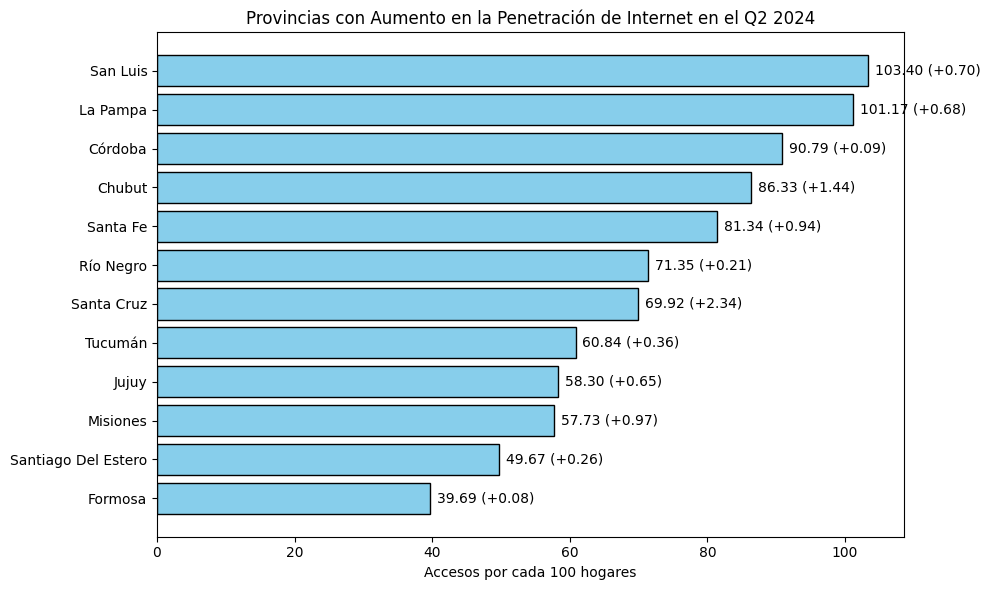

In [69]:
# Ordenar los datos por el valor de Accesos por cada 100 hogares para una mejor visualización
df_aumento = df_aumento.sort_values(by='Accesos por cada 100 hogares', ascending=True)

# Crear el gráfico de barras horizontal
plt.figure(figsize=(10, 6))
plt.barh(df_aumento['Provincia'], df_aumento['Accesos por cada 100 hogares'], color='skyblue', edgecolor='black')

# Añadir las etiquetas de cambio en cada barra
for index, value in enumerate(df_aumento['Accesos por cada 100 hogares']):
    cambio = df_aumento['Cambio'].iloc[index]
    plt.text(value + 1, index, f'{value:.2f} (+{cambio:.2f})', va='center')

# Personalizar el gráfico
plt.xlabel('Accesos por cada 100 hogares')
plt.title('Provincias con Aumento en la Penetración de Internet en el Q2 2024')
plt.tight_layout()
plt.show()

Interpretación: 
- El gráfico muestran especificamente en estas 12 provincias el aumento en la penetración de internet en comparación con el trimestre anterior. Esto indica una tendencia positiva en la expansión del acceso a internet en Argentina.
- Los valores entre paréntesis indican el porcentaje de aumento en la penetración de internet respecto al trimestre anterior. Se observa que algunas provincias, como Chubut y Santa Cruz, experimentaron un crecimiento porcentual más significativo.

Conclusión:
- El aumento en la penetración de internet refleja una creciente demanda de servicios de conectividad por parte de los hogares argentinos.
- El crecimiento del mercado de internet en Argentina representa una oportunidad para los proveedores de servicios de internet, quienes pueden ofrecer una amplia gama de servicios y productos.

### KPI 2:
- Aumentar en un 2% el acceso al servicio de internet para el próximo trimestre, cada 100 hogares, por provincia.

In [70]:
# Filtramos el df sólo para los dos ultimos años
df4_filtrado = df4[df4['Año'].isin([2023, 2024])]

# Calcular la mediana de "Accesos por cada 100 hogares"

mediana_accesos = df4_filtrado['Accesos por cada 100 hogares'].median()
print(f'Mediana de Accesos por cada 100 hogares: {mediana_accesos}')

# Identificar las provincias con baja penetración (por debajo de la mediana)
provincias_baja_penetracion = df4_filtrado[df4_filtrado['Accesos por cada 100 hogares'] < mediana_accesos]['Provincia'].unique()
print('Provincias con baja penetración:', provincias_baja_penetracion)

# Crear una copia del DataFrame filtrado para el nuevo DataFrame de resultados
df_kpi = df4_filtrado.copy()

# Calcular el nuevo valor de acceso con el aumento del 2% para provincias con baja penetración
df_kpi['Nuevo_acceso'] = df_kpi.apply(
    lambda row: row['Accesos por cada 100 hogares'] * 1.02 if row['Provincia'] in provincias_baja_penetracion else row['Accesos por cada 100 hogares'],
    axis=1
)

# Calcular el KPI
df_kpi['KPI_Aumento_Acceso'] = ((df_kpi['Nuevo_acceso'] - df_kpi['Accesos por cada 100 hogares']) / df_kpi['Accesos por cada 100 hogares']) * 100

# Crear un DataFrame para mostrar solo con las columnas relevantes
df_kpi_mostrar = df_kpi[['Provincia', 'Accesos por cada 100 hogares', 'Nuevo_acceso', 'KPI_Aumento_Acceso']]

# Mostrar los primeros registros del DataFrame resultado
df_kpi_mostrar.head()

Mediana de Accesos por cada 100 hogares: 68.63499999999999
Provincias con baja penetración: ['Chaco' 'Corrientes' 'Formosa' 'Jujuy' 'Mendoza' 'Misiones' 'Salta'
 'San Juan' 'Santiago Del Estero' 'Tucumán' 'Santa Cruz' 'Catamarca'
 'Río Negro' 'Entre Ríos']


,Provincia,Accesos por cada 100 hogares,Nuevo_acceso,KPI_Aumento_Acceso
0,Buenos Aires,79.84,79.8400,0.0
1,Capital Federal,116.37,116.3700,0.0
2,Catamarca,68.81,70.1862,2.0
3,Chaco,44.06,44.9412,2.0
4,Chubut,86.33,86.3300,0.0


In [71]:
df_kpi_2=df_kpi.copy()

In [72]:
df_kpi_2=df_kpi_2[df_kpi_2['Provincia'].isin(provincias_baja_penetracion)]

In [73]:
df_kpi_2.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Fecha,Nuevo_acceso,KPI_Aumento_Acceso
2,2024,2,Catamarca,68.81,2024-04-01,70.1862,2.0
3,2024,2,Chaco,44.06,2024-04-01,44.9412,2.0
6,2024,2,Corrientes,51.38,2024-04-01,52.4076,2.0
7,2024,2,Entre Ríos,68.64,2024-04-01,70.0128,2.0
8,2024,2,Formosa,39.69,2024-04-01,40.4838,2.0


### 4.5 Hoja 12: Accesos por rangos

Accesos a internet desglosados por velocidad de conexión.

In [74]:
df5 = pd.read_excel(ruta_archivo, sheet_name='Accesos por rangos')

df5.head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2024,2,Buenos Aires,25287.0,23034.0,222627.0,221660.0,244528.0,106302.0,4020395.0,125547.0,4989380.0
1,2024,2,Capital Federal,518.0,4122.0,24539.0,40296.0,33158.0,5633.0,1355333.0,0.0,1463599.0
2,2024,2,Catamarca,72.0,164.0,2660.0,3093.0,3799.0,1279.0,63954.0,53.0,75074.0
3,2024,2,Chaco,236.0,349.0,14594.0,8336.0,6208.0,6454.0,107707.0,3208.0,147092.0
4,2024,2,Chubut,125.0,1139.0,43699.0,31971.0,22696.0,19827.0,38212.0,16554.0,174223.0


In [75]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  1000 non-null   int64  
 1   Trimestre            1000 non-null   int64  
 2   Provincia            1000 non-null   object 
 3   HASTA 512 kbps       1000 non-null   float64
 4   + 512 Kbps - 1 Mbps  1000 non-null   float64
 5   + 1 Mbps - 6 Mbps    1000 non-null   float64
 6   + 6 Mbps - 10 Mbps   1000 non-null   float64
 7   + 10 Mbps - 20 Mbps  1000 non-null   float64
 8   + 20 Mbps - 30 Mbps  1000 non-null   float64
 9   + 30 Mbps            1000 non-null   float64
 10  OTROS                994 non-null    float64
 11  Total                1000 non-null   float64
dtypes: float64(9), int64(2), object(1)
memory usage: 93.9+ KB


Tratamiento de valores nulos y duplicados

In [76]:
df5.isnull().sum()# No se encontraron datos nulos

Año                    0
Trimestre              0
Provincia              0
HASTA 512 kbps         0
+ 512 Kbps - 1 Mbps    0
+ 1 Mbps - 6 Mbps      0
+ 6 Mbps - 10 Mbps     0
+ 10 Mbps - 20 Mbps    0
+ 20 Mbps - 30 Mbps    0
+ 30 Mbps              0
OTROS                  6
Total                  0
dtype: int64

In [77]:
# Manejo de valores nulos
df5['OTROS'] = df5['OTROS'].fillna(0)  # Opción de rellenar nulos con 0

# Limpiar nombres de columnas
#df5.columns = df5.columns.str.strip().str.replace(' ', '_').str.replace('+', 'mas').str.replace('-', '_').str.lower()

# Verificar y ajustar tipos de datos (si es necesario)
print(df5.dtypes)  # Para verificar tipos

# Verificar valores inconsistentes (negativos)
negativos = df5[df5.select_dtypes(include=['float64', 'int64']).lt(0).any(axis=1)]
print("Filas con valores negativos:\n", negativos)

# Corregir valores negativos aplicando valor absoluto a la columna con valores negativos
df5['OTROS'] = df5['OTROS'].abs()

Año                      int64
Trimestre                int64
Provincia               object
HASTA 512 kbps         float64
+ 512 Kbps - 1 Mbps    float64
+ 1 Mbps - 6 Mbps      float64
+ 6 Mbps - 10 Mbps     float64
+ 10 Mbps - 20 Mbps    float64
+ 20 Mbps - 30 Mbps    float64
+ 30 Mbps              float64
OTROS                  float64
Total                  float64
dtype: object
Filas con valores negativos:
       Año  Trimestre   Provincia  HASTA 512 kbps  + 512 Kbps - 1 Mbps  \
323  2021          1    La Rioja            18.0                  1.0   
331  2021          1  Santa Cruz            50.0                  0.0   

     + 1 Mbps - 6 Mbps  + 6 Mbps - 10 Mbps  + 10 Mbps - 20 Mbps  \
323            36749.0              5968.0               4604.0   
331            30655.0              8334.0               6987.0   

     + 20 Mbps - 30 Mbps  + 30 Mbps   OTROS    Total  
323                215.0     5074.0    -1.0  52628.0  
331               1337.0      647.0 -1945.0  46065.0

In [78]:

# Verificar valores inconsistentes (negativos)
negativos = df5[df5.select_dtypes(include=['float64', 'int64']).lt(0).any(axis=1)]
print("Filas con valores negativos:\n", negativos)

Filas con valores negativos:
 Empty DataFrame
Columns: [Año, Trimestre, Provincia, HASTA 512 kbps, + 512 Kbps - 1 Mbps, + 1 Mbps - 6 Mbps, + 6 Mbps - 10 Mbps, + 10 Mbps - 20 Mbps, + 20 Mbps - 30 Mbps, + 30 Mbps, OTROS, Total]
Index: []


In [79]:
# Verificar duplicados
print(f"Número de filas duplicadas: {df5.duplicated().sum()}")


Número de filas duplicadas: 0


In [80]:
# Obtener lista de nombres únicos de provincias
print(df5['Provincia'].unique()) # Se observa que existen 24 provincias únicas, no requiere transformaciones


['Buenos Aires' 'Capital Federal' 'Catamarca' 'Chaco' 'Chubut' 'Córdoba'
 'Corrientes' 'Entre Ríos' 'Formosa' 'Jujuy' 'La Pampa' 'La Rioja'
 'Mendoza' 'Misiones' 'Neuquén' 'Río Negro' 'Salta' 'San Juan' 'San Luis'
 'Santa Cruz' 'Santa Fe' 'Santiago Del Estero' 'Tierra Del Fuego'
 'Tucumán']


Verificamos que los años y los trimestres correspondan a cada año

In [81]:
print("Años disponibles:", df5['Año'].unique())
print("Trimestres disponibles por año:")
print(df5.groupby('Año')['Trimestre'].unique())

Años disponibles: [2024 2023 2022 2021 2020 2019 2018 2017 2016 2015 2014]
Trimestres disponibles por año:
Año
2014    [4, 3, 2, 1]
2015    [4, 3, 2, 1]
2016    [4, 3, 2, 1]
2017    [4, 3, 2, 1]
2018    [4, 3, 2, 1]
2019    [4, 3, 2, 1]
2020    [4, 3, 2, 1]
2021    [4, 3, 2, 1]
2022    [4, 3, 2, 1]
2023       [3, 2, 1]
2024       [2, 1, 4]
Name: Trimestre, dtype: object


El año 2023 y 2004 presenta inconsistencias, el cual es un error de digitación, por lo que modificamos la data

In [82]:
# Verificar los registros con el año 2024 y trimestre 4 para asegurarnos de que son los datos incorrectos
print("Registros erróneos detectados:")
print(df5[(df5['Año'] == 2024) & (df5['Trimestre'] == 4)])

# Corregir los registros erróneos: cambiar el año de 2024 a 2023 para los trimestres 4
df5.loc[(df5['Año'] == 2024) & (df5['Trimestre'] == 4), 'Año'] = 2023

# Confirmar la corrección
print("\nRegistros corregidos:")
print(df5[(df5['Año'] == 2023) & (df5['Trimestre'] == 4)])

# Verificar los trimestres disponibles por año después de la corrección
print("\nTrimestres disponibles por año después de la corrección:")
print(df5.groupby('Año')['Trimestre'].unique())

Registros erróneos detectados:
     Año  Trimestre            Provincia  HASTA 512 kbps  + 512 Kbps - 1 Mbps  \
48  2024          4         Buenos Aires         26909.0              23962.0   
49  2024          4      Capital Federal           516.0               4544.0   
50  2024          4            Catamarca            71.0                209.0   
51  2024          4                Chaco           236.0                477.0   
52  2024          4               Chubut           111.0               1088.0   
53  2024          4              Córdoba            99.0               8404.0   
54  2024          4           Corrientes            67.0               2889.0   
55  2024          4           Entre Ríos           107.0               4408.0   
56  2024          4              Formosa            85.0                179.0   
57  2024          4                Jujuy            58.0               1343.0   
58  2024          4             La Pampa            71.0               1330.0 

In [83]:
df5.head(2)

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2024,2,Buenos Aires,25287.0,23034.0,222627.0,221660.0,244528.0,106302.0,4020395.0,125547.0,4989380.0
1,2024,2,Capital Federal,518.0,4122.0,24539.0,40296.0,33158.0,5633.0,1355333.0,0.0,1463599.0


Análisis del acceso a internet por rango de velocidad

In [84]:
# Función para el análisis
def acceso_rango_velocidad(df):
    # Filtramos solo los años válidos y excluir el año 2024
    df['Año'] = pd.to_numeric(df['Año'], errors='coerce')  # Convertir a número, manejar valores inválidos
    df['Trimestre'] = pd.to_numeric(df['Trimestre'], errors='coerce')  # Convertir a número
    
    # Filtramos años válidos entre 2014 y 2023 y trimestres entre 1 y 4
    df = df[(df['Año'].between(2014, 2023)) & (df['Trimestre'].between(1, 4))]

    # Convertir columnas de 'Año' y 'Trimestre' a un formato de fecha trimestral
    df['Fecha'] = df['Año'].astype(str) + '-Q' + df['Trimestre'].astype(str)
    df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce').dt.to_period('Q')

    # Agrupar por fecha y sumar los accesos de cada tecnología
    tech_trends = df.groupby('Fecha')[['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', 
                             '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', 
                             '+ 30 Mbps']].sum()

    # Aplicar una ventana deslizante para suavizar la serie de tiempo
    window_size = 4
    tech_trends_smoothed = tech_trends.rolling(window=window_size).mean()

    # Creamos el gráfico de líneas para cada tecnología
    plt.figure(figsize=(12, 6))
    for tech in tech_trends.columns:
        plt.plot(tech_trends.index.to_timestamp(), tech_trends[tech], label=tech)

    # Configurar etiquetas y título
    plt.xlabel('Fecha')
    plt.ylabel('Número de accesos')
    plt.title('Tendencia del acceso a internet por rango de velocidad en Argentina (2014-2023)')
    plt.legend(title='Rango de Velocidad')
    plt.grid(True)
    plt.show()

    # Creamos un gráfico de área para visualizar la contribución de cada tecnología
    plt.figure(figsize=(12, 6))
    plt.stackplot(tech_trends.index.to_timestamp(), 
                  tech_trends['HASTA 512 kbps'], 
                  tech_trends['+ 512 Kbps - 1 Mbps'], 
                  tech_trends['+ 1 Mbps - 6 Mbps'], 
                  tech_trends['+ 6 Mbps - 10 Mbps'], 
                  tech_trends['+ 10 Mbps - 20 Mbps'],                             
                  tech_trends['+ 20 Mbps - 30 Mbps'], 
                  tech_trends['+ 30 Mbps'], 
                  labels=tech_trends.columns)

    # Configurar etiquetas y título
    plt.xlabel('Fecha')
    plt.ylabel('Número de accesos')
    plt.title('Contribución acumulativa por rango de velocidad en Argentina (2014-2023)')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

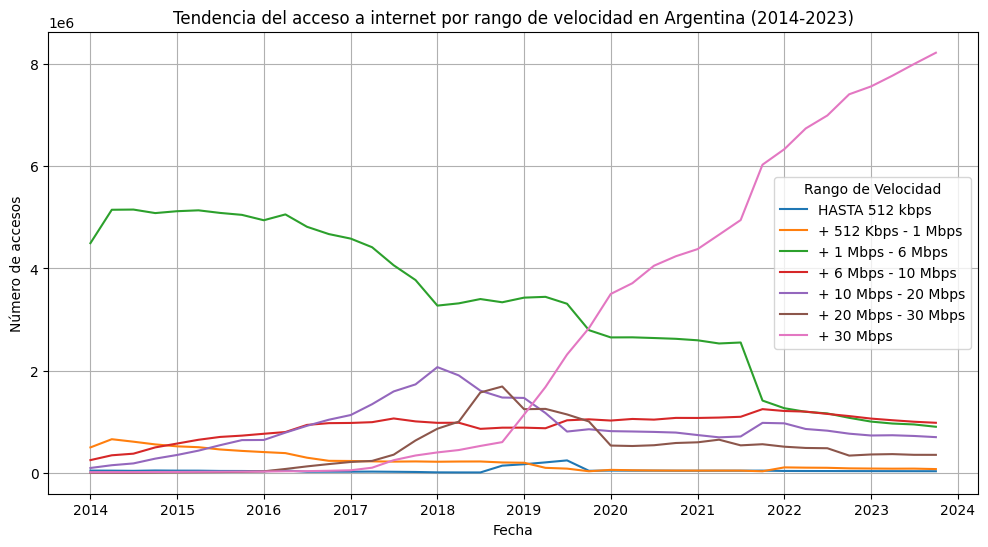

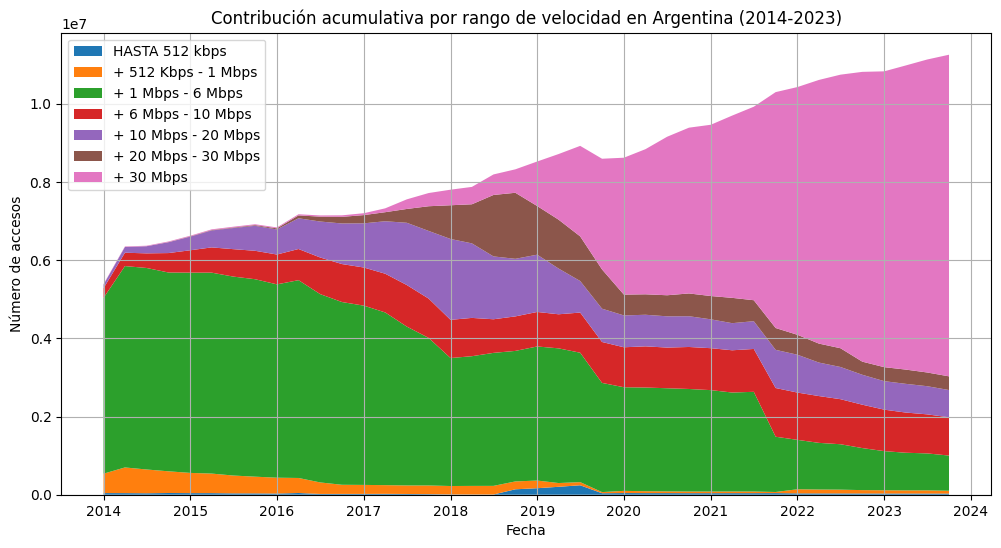

In [85]:
acceso_rango_velocidad(df5)

Interpretación:

Gráfico 1: Tendencia del acceso a internet por rango de velocidad en Argentina
- Se observa una tendencia clara hacia el aumento de conexiones con mayores velocidades. Las líneas correspondientes a rangos de velocidad más altos (10 Mbps en adelante) muestran un crecimiento más pronunciado, mientras que las líneas de rangos más bajos tienden a estabilizarse o incluso disminuir.

Gráfico 2: Contribución acumulativa por rango de velocidad en Argentina
- Se observa que hasta aproximadamente 2018, las conexiones con velocidades más bajas (hasta 10 Mbps) representaban una proporción significativa del total de accesos. Pero a partir de mismo año (2018), se observa un cambio de tendencia, con un aumento progresivo de la proporción de conexiones con velocidades superiores a 10 Mbps. Esto indica una migración gradual de los usuarios hacia servicios de mayor calidad y capacidad.

Conclusión:
- Los usuarios están migrando hacia conexiones más rápidas, lo que impulsa a las empresas de telecomunicaciones a invertir en infraestructura de mayor capacidad.
- La evolución de los rangos de velocidad sugiere una modernización gradual de las redes de telecomunicaciones en el país.

Distribucón de acceso a internet por rango de velocidades

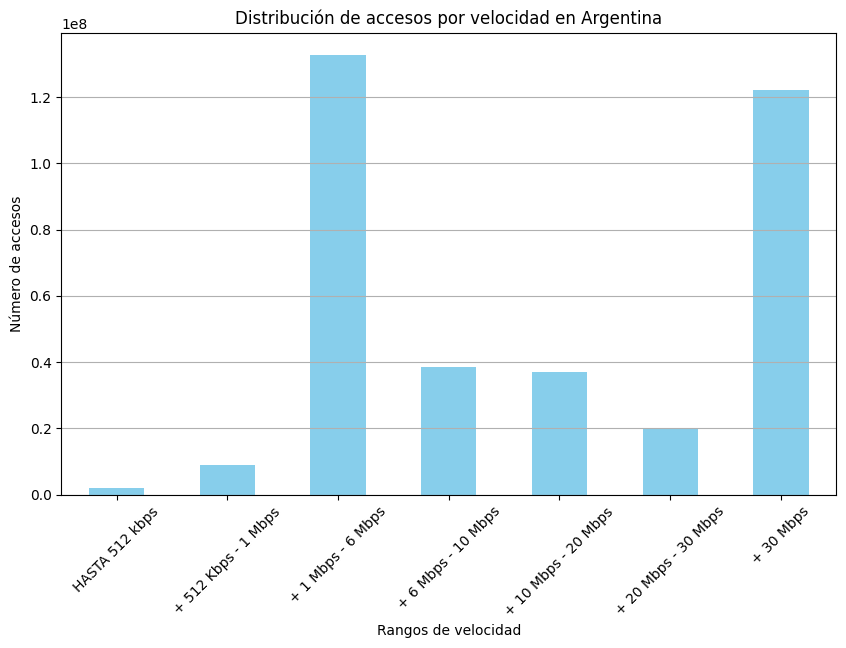

In [86]:
accesos_por_velocidad = df5[['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', 
                             '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', 
                             '+ 30 Mbps']].sum()

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
accesos_por_velocidad.plot(kind='bar', color='skyblue')
plt.title('Distribución de accesos por velocidad en Argentina')
plt.xlabel('Rangos de velocidad')
plt.ylabel('Número de accesos')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Interpretación:
- La mayor parte de los accesos a internet en Argentina se concentran en los rango de velocidad de 1 a 6 Mbps, esto nos indica que una gran parte de la población tiene acceso a una velocidad de conexión que le permite realizar tareas básicas de navegación, correo electrónico y streaming de video en calidad estándar.
- Las conexiones de más de 30 Mbps representa un proporción considerable, este tipo de conexiones es ideal para activideades que demandan mayor ancho de banda como juegos en línea.
- Conexiones de '+ 6 Mbps - 10 Mbps" , "+ 10 Mbps - 20 Mbps" y "+ 20 Mbps - 30 Mbps" presentan cifras moderadas pero no compiten con las conexiones de velocidades más altas.
- Los rangos de velocidad más baja (hasta 512 Kbps y 512 Kbps a 1 Mbps) muestran una cantidad considerable de accesos, aunque menor en comparación con los demás. Esto nos indica que una parte de la población aún cuenta con conexiones de baja velocidad.

Conclusión:

El gráfico evidencia una transisicón hacia conexiones de mayor velocidad en Argentina, esto estaría explicada en gran parte por la expansión de tecnologías modeternas como la fibra óptica. Sin embargo, también se observa una distribución desigual de velocidades de conexión, generando brechas digitales entre las diferentes provincias y grupos sociales, por lo que es necesario seguir invirtiendo en infraestructura de telecomunicaciones para aumentar la disponibilidad de conexiones de alta velocidad en todo el país.

Generamos el gráfico de cajas que muestra la distribución de accesos a internet por rango de velocidades

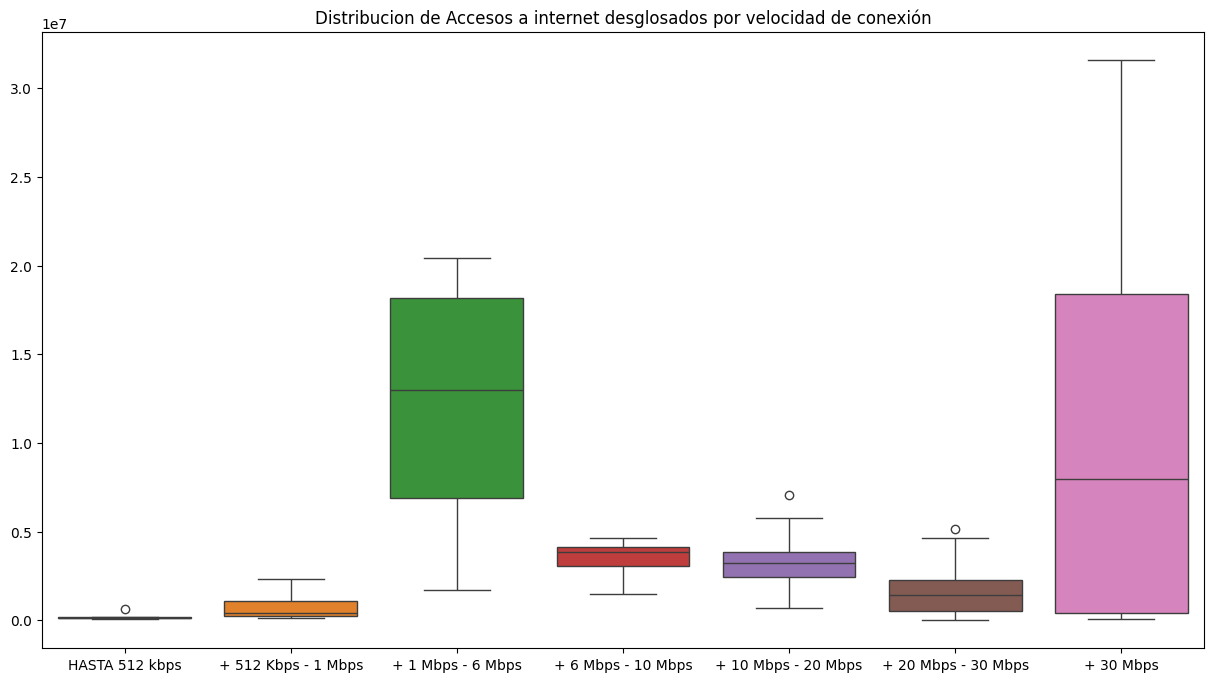

In [87]:
# Agrupamos por fecha y sumar los accesos por rango de velocidades
tech_trends = df5.groupby('Año')[['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', 
                             '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', 
                             '+ 30 Mbps']].sum()

# Asegurarse que no haya valores negativos 
tech_trends = tech_trends.clip(lower=0)

# Creamos un gráfico de caja para identificar valores atípicos
plt.figure(figsize=(15, 8))
sns.boxplot(data=tech_trends)
plt.title('Distribucion de Accesos a internet desglosados por velocidad de conexión')
plt.show()

Interpretación:
- El rango "+ 30 Mbps" lidera tanto en cantidad como en dispersión, mostrando una fuerte preferencia por velocidades altas en el país.
- Las categorías más lentas muestran que han quedado en desuso (Hasta 512 Kbps y  +512 Kbps-1 Mbps), probablemente debido a la modernización de la infraestructura de telecomunicaciones.

Realizamos el Análisis detallado de velocidad por provincia

Preparamos los datos para el mapa de calor

In [88]:
# Calcular el porcentaje de cada rango de velocidad respecto al total por provincia
df5_porcentajes = df5.copy()
columnas_velocidades = [
    'HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', 
    '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps'
]

# Calcular porcentajes
for col in columnas_velocidades:
    df5_porcentajes[col] = (df5[col] / df5['Total']) * 100

# Agrupar los datos por provincia (promedio de porcentajes por trimestre y año)
df5_promedio = df5_porcentajes.groupby('Provincia')[columnas_velocidades].mean()

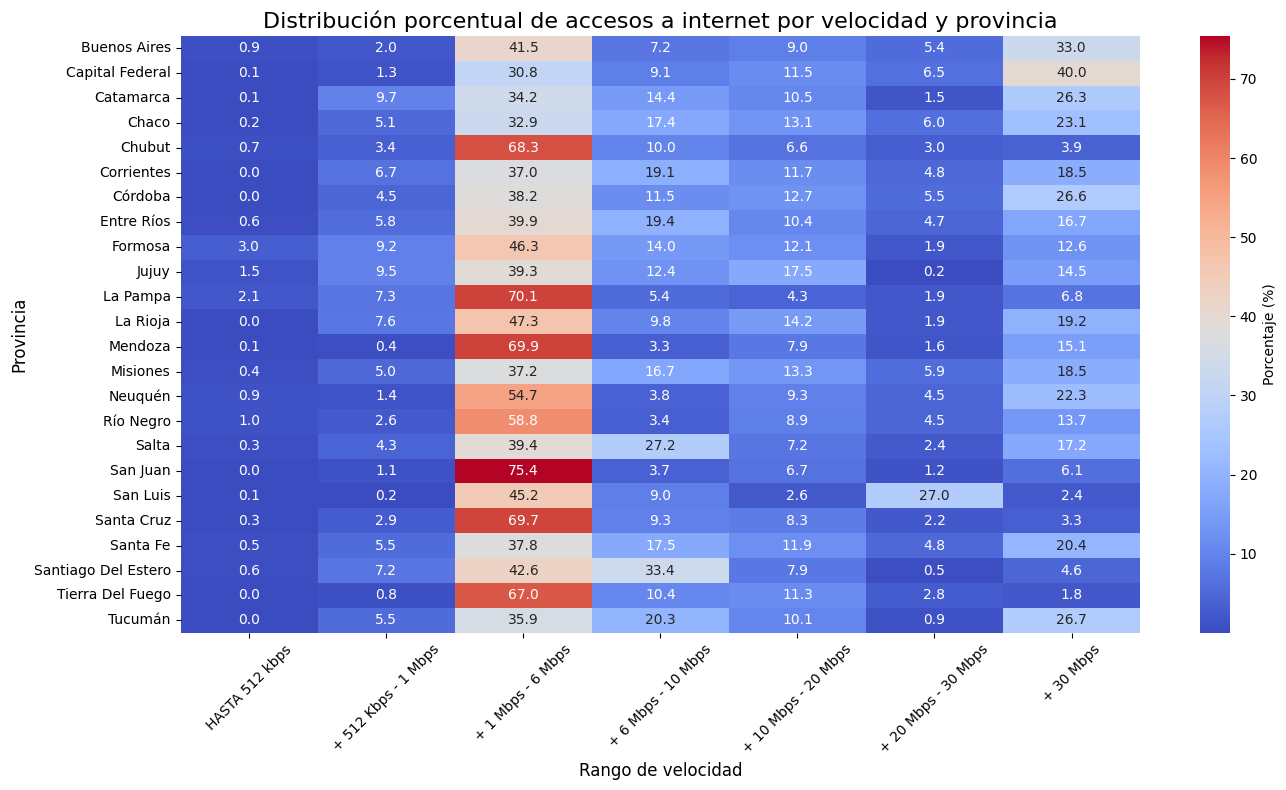

In [89]:
# Crearmos un heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(df5_promedio, annot=True, fmt=".1f", cmap="coolwarm", cbar_kws={'label': 'Porcentaje (%)'})

# Personalización del gráfico
plt.title("Distribución porcentual de accesos a internet por velocidad y provincia", fontsize=16)
plt.xlabel("Rango de velocidad", fontsize=12)
plt.ylabel("Provincia", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Interpretación:
- La Capital Federal destaca por tener una alta proporción de conexiones de 30 Mbps o más, lo que indica una mayor adopción de servicios de alta velocidad, seguido de la provincia de Buenos Aires.
- Se observa una gran heterogeneidad en la distribución de velocidades a lo largo del país. Mientras algunas provincias concentran un alto porcentaje de conexiones de alta velocidad, otras aún presentan una mayor proporción de conexiones de baja velocidad.

Conclusión:
- El mapa evidencia una marcada desigualdad en el acceso a internet de alta velocidad entre las diferentes provincias argentinas.
- Las diferencias en la infraestructura de telecomunicaciones podrían explicar en gran medida estas disparidades, es decir, las provincias con mayor densidad poblacional y mayor desarrollo económico suelen tener una mejor infraestructura de telecomunicaciones.


Distribución de rango de velocidades por provincia

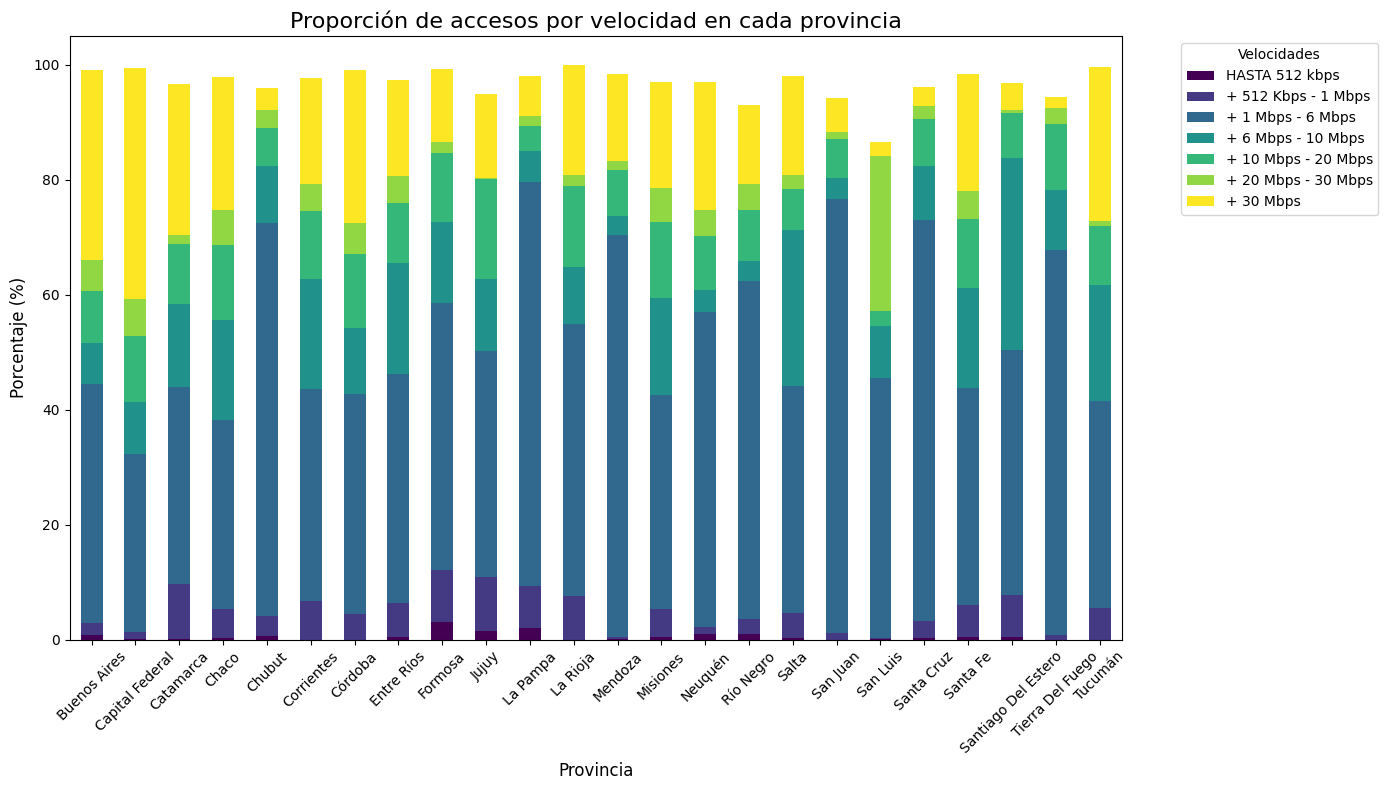

In [90]:
# Creamos un gráfico de barras apiladas
fig, ax = plt.subplots(figsize=(14, 8))
df5_promedio.plot(kind="bar", stacked=True, colormap="viridis", ax=ax)

# Personalización del gráfico
ax.set_title("Proporción de accesos por velocidad en cada provincia", fontsize=16)
ax.set_ylabel("Porcentaje (%)", fontsize=12)
ax.set_xlabel("Provincia", fontsize=12)
ax.legend(title="Velocidades", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Interpretación:
- Todas la provincias sin excepción cuentan con todos los rangos de velocidades para acceso a internet, a su vez la proporción de velocidades por rango en cada provincia difieren entre si, pero teniendo mayor relevancia la velocidad + 1 Mbps a 6 Mbps, seguido del rango de velocidad 30 Mbps a más. 
- La Capital Federal y la provincias de Buenos Aires, presentan una mayor proporción de conexiones de alta velocidad (30 Mbps o más), lo que indica una mejor infraestructura y mayor adopción de servicios de banda ancha.
- En la mayoría de las provincias, la mayor parte de las conexiones se concentran en los rangos de velocidad intermedios (1 Mbps a 10 Mbps), lo que indica que la población en general tiene acceso a una velocidad suficiente para realizar tareas básicas en línea, pero puede encontrar limitaciones para actividades que demandan mayor ancho de banda.
- El gráfico evidencia una gran heterogeneidad en la distribución de velocidades a lo largo del territorio argentino, lo que refleja las diferencias en términos de desarrollo económico, infraestructura y políticas públicas de cada provincia.

Conclusión:
- La desigualdad en la distribución de velocidades de conexión refleja una brecha digital entre las diferentes provincias del país, lo que puede limitar el acceso a oportunidades educativas, laborales y sociales para los habitantes de zonas con menor conectividad.
- Es necesario invertir en infraestructura de telecomunicaciones para expandir la cobertura y mejorar la calidad de las conexiones en las zonas más rezagadas.

Observamos como se ha comportado los Accesos a Internet por rango de velocidad en el ultimo trimestre 2024

In [91]:
# Encontrar el último año y trimestre disponibles basados en el registro más reciente
ultimo_registro = df5.sort_values(by=['Año', 'Trimestre'], ascending=[True, True]).iloc[-1]
ultimo_anio = ultimo_registro['Año']
ultimo_trimestre = ultimo_registro['Trimestre']

# Filtrar el DataFrame para el último trimestre identificado
df_ultimo_trimestre = df5[(df5['Año'] == ultimo_anio) & (df5['Trimestre'] == ultimo_trimestre)]

print(f"Análisis del último trimestre: Año {ultimo_anio}, Trimestre {ultimo_trimestre}")

Análisis del último trimestre: Año 2024, Trimestre 2


In [92]:
# Sumar los accesos para cada rango de velocidad en el último trimestre
demanda_velocidades = df_ultimo_trimestre[['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps',
                                           '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', 
                                           '+ 20 Mbps - 30 Mbps', '+ 30 Mbps']].sum().sort_values(ascending=False)

# Mostrar el resultado
print(demanda_velocidades)

+ 30 Mbps              8357088.0
+ 6 Mbps - 10 Mbps      911374.0
+ 1 Mbps - 6 Mbps       840200.0
+ 10 Mbps - 20 Mbps     662649.0
+ 20 Mbps - 30 Mbps     348253.0
+ 512 Kbps - 1 Mbps      67024.0
HASTA 512 kbps           28151.0
dtype: float64


Creamos el gráfico de la cantidad de conexiones por rango de velocidad trimeste 2 del 2024

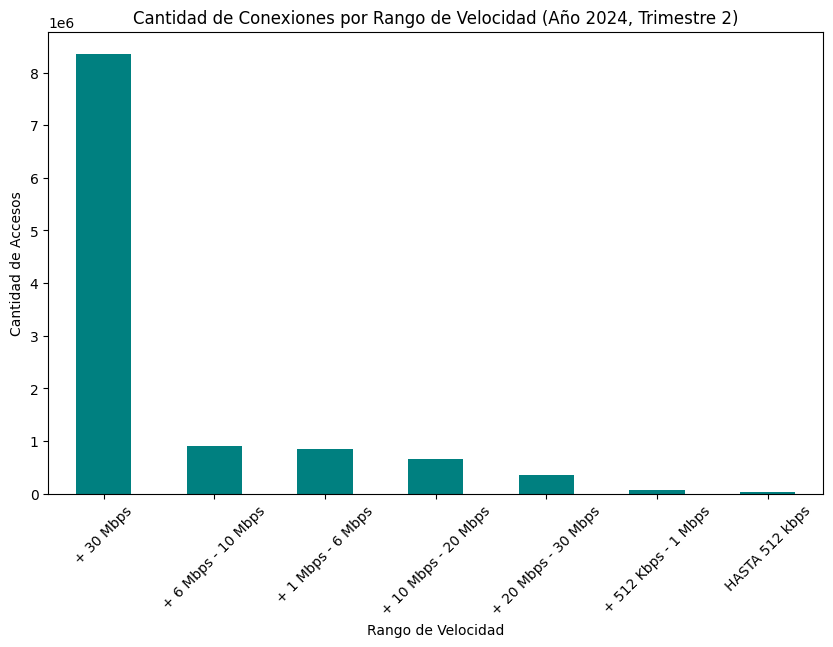

In [93]:
# Creamos gráfico de barras
plt.figure(figsize=(10, 6))
demanda_velocidades.plot(kind='bar', color='teal')
plt.title(f'Cantidad de Conexiones por Rango de Velocidad (Año {ultimo_anio}, Trimestre {ultimo_trimestre})')
plt.xlabel('Rango de Velocidad')
plt.ylabel('Cantidad de Accesos')
plt.xticks(rotation=45)
plt.show()

Interpretación:
- Se observa que la gran mayoría de las conexiones a internet en Argentina durante el 2 trimestre del 2004, correspondían a velocidades de más de 30 Mbps. Esto indica una tendencia creciente hacia conexiones más rápidas y de mayor calidad.
- La cantidad de conexiones con velocidades de hasta 512 kbps es muy baja en comparación con las demás. Esto sugiere que el acceso a internet de baja velocidad está siendo reemplazado progresivamente por opciones más rápidas.

Análisis del crecimiento relativo de acceso por velocidad y por provincia en el trimestre 1 y 2 del 2024

<Figure size 1400x1000 with 0 Axes>

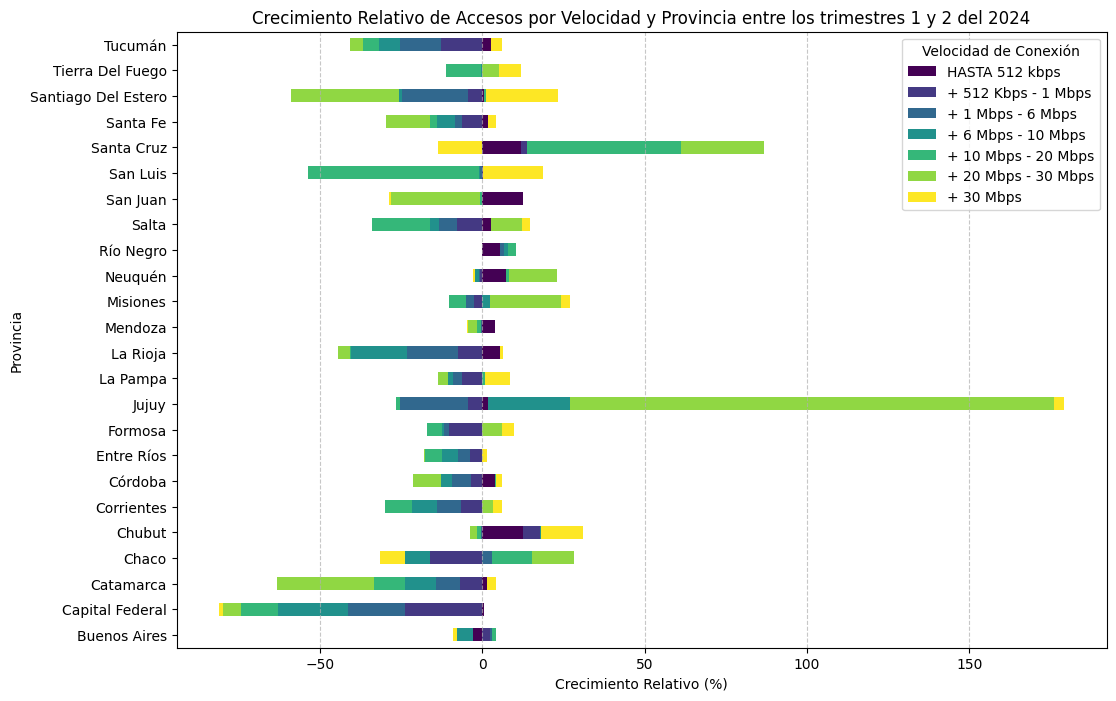

In [94]:
# Filtramos el df5 para el análisis de los trimestres y años específicos
ultimo_anio = 2024
ultimo_trimestre = 2
penultimo_trimestre = 1

# Filtrar datos para el trimestre 2 de 2024
ultimo_datos = df5[(df5['Año'] == ultimo_anio) & (df5['Trimestre'] == ultimo_trimestre)].copy()

# Filtrar datos para el trimestre 1 de 2024
penultimo_datos = df5[(df5['Año'] == ultimo_anio) & (df5['Trimestre'] == penultimo_trimestre)].copy()

# Verificar que los datos tengan las columnas necesarias para el análisis
columnas_interes = ['Provincia', 'HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', 
                    '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps']

ultimo_datos = ultimo_datos[columnas_interes].copy()
penultimo_datos = penultimo_datos[columnas_interes].copy()

# Agrupar por provincia y calcular la suma de accesos en cada categoría
ultimo_agregado = ultimo_datos.groupby('Provincia').sum()
penultimo_agregado = penultimo_datos.groupby('Provincia').sum()

# Calcular el crecimiento relativo por provincia para cada categoría de velocidad
crecimiento_relativo_provincia = ((ultimo_agregado - penultimo_agregado) / penultimo_agregado) * 100

# Reemplazar valores NaN (por ejemplo, si no hay datos previos para alguna categoría) con 0
crecimiento_relativo_provincia = crecimiento_relativo_provincia.fillna(0)

# Seleccionar solo las columnas de velocidad de interés
crecimiento_relativo_provincia = crecimiento_relativo_provincia[['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', 
                                                                 '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', 
                                                                 '+ 20 Mbps - 30 Mbps', '+ 30 Mbps']]

# Visualizar los resultados
plt.figure(figsize=(14, 10))
crecimiento_relativo_provincia.plot(kind='barh', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Crecimiento Relativo de Accesos por Velocidad y Provincia entre los trimestres 1 y 2 del 2024')
plt.xlabel('Crecimiento Relativo (%)')
plt.ylabel('Provincia')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend(title='Velocidad de Conexión')
plt.show()

Interpretación:
- Crecimiento Positivo: Algunas provincias muestran un aumento en ciertas velocidades de conexión, como Santiago del Estero, San Luis, y La Pampa, entre otras donde el acceso a velocidades más altas (+30 Mbps) parece haber crecido sustancialmente.

- Disminución o Crecimiento Negativo: Provincias como Tucuman, La Rioja, Catamarca y Capital Federal exhiben una caída en los accesos en algunos rangos de velocidad más bajos. Esto podría ser una señal de migración de clientes hacia proveedores con mejores ofertas, limitaciones de infraestructura, o desinterés en adoptar velocidades más altas.

- Provincias con Accesos Más Lentos: Algunos tramos de baja velocidad (+512 Kbps - 1 Mbps) aún muestran movimientos, lo cual podría ser un área crítica a mejorar.

### PKI 3:

- Aumentar en un 5% de accesos con velocidades superiores a 20 Mbps 

In [95]:
# Filtramos los datos para el trimestre 2 del año 2024
df_2024_Q2 = df5[(df5['Año'] == 2024) & (df5['Trimestre'] == 2)].copy()

# Identificamos las provincias con baja velocidad de conexión (menor a 20 Mbps)
# Calculamos la velocidad priomedio de conexiones por provincia
df_2024_Q2.loc[:, 'Velocidad_promedio'] = (df_2024_Q2['HASTA 512 kbps'] * 0.512 +
                                           df_2024_Q2['+ 512 Kbps - 1 Mbps'] * 1 +
                                           df_2024_Q2['+ 1 Mbps - 6 Mbps'] * 6 +
                                           df_2024_Q2['+ 6 Mbps - 10 Mbps'] * 10 +
                                           df_2024_Q2['+ 10 Mbps - 20 Mbps'] * 20 +
                                           df_2024_Q2['+ 20 Mbps - 30 Mbps'] * 30 +
                                           df_2024_Q2['+ 30 Mbps'] * 30) / df_2024_Q2['Total']

#Identificamos las provincias con baja velicidad de conexión menor a 20 Mbps
provincias_baja_velocidad = df_2024_Q2[df_2024_Q2['Velocidad_promedio'] < 20].copy()

# Calculamos el nuevo acceso aumentando en un 5% las conexiones mayores a 20 Mbps
provincias_baja_velocidad.loc[:, 'Acceso_mayor_20_Mbps'] = provincias_baja_velocidad['+ 20 Mbps - 30 Mbps'] + provincias_baja_velocidad['+ 30 Mbps'] # nueva variable de acceso
provincias_baja_velocidad.loc[:, 'Nuevo_acceso'] = provincias_baja_velocidad['Acceso_mayor_20_Mbps'] * 1.05

# Caculamos el KPI
provincias_baja_velocidad.loc[:, 'KPI_Aumento_Acceso'] = ((provincias_baja_velocidad['Nuevo_acceso'] - provincias_baja_velocidad['Acceso_mayor_20_Mbps']) / provincias_baja_velocidad['Acceso_mayor_20_Mbps']) * 100

     

In [96]:

# Mostramos el DataFrame con el KPI calculado
provincias_baja_velocidad[['Provincia', 'Acceso_mayor_20_Mbps', 'Nuevo_acceso', 'KPI_Aumento_Acceso']]


,Provincia,Acceso_mayor_20_Mbps,Nuevo_acceso,KPI_Aumento_Acceso
4,Chubut,58039.0,60940.95,5.0
8,Formosa,25831.0,27122.55,5.0
10,La Pampa,44084.0,46288.20,5.0
14,Neuquén,83352.0,87519.60,5.0
16,Salta,102603.0,107733.15,5.0
17,San Juan,34608.0,36338.40,5.0
19,Santa Cruz,21248.0,22310.40,5.0
21,Santiago Del Estero,36170.0,37978.50,5.0
22,Tierra Del Fuego,22894.0,24038.70,5.0


In [97]:
df_kpi_3 = provincias_baja_velocidad.copy()

In [98]:
df_kpi_3.head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total,Velocidad_promedio,Acceso_mayor_20_Mbps,Nuevo_acceso,KPI_Aumento_Acceso
4,2024,2,Chubut,125.0,1139.0,43699.0,31971.0,22696.0,19827.0,38212.0,16554.0,174223.0,15.946213,58039.0,60940.95,5.0
8,2024,2,Formosa,85.0,142.0,21748.0,10864.0,3989.0,290.0,25541.0,291.0,62950.0,17.379246,25831.0,27122.55,5.0
10,2024,2,La Pampa,71.0,1330.0,43807.0,17017.0,15353.0,5168.0,38916.0,1601.0,123263.0,16.744346,44084.0,46288.20,5.0
14,2024,2,Neuquén,146.0,990.0,35229.0,13345.0,10590.0,3367.0,79985.0,19890.0,163542.0,18.700082,83352.0,87519.60,5.0
16,2024,2,Salta,117.0,853.0,25886.0,62722.0,2619.0,68.0,102535.0,6541.0,201341.0,19.439254,102603.0,107733.15,5.0


---

### 4.6 Hoja 15: 'Ingresos'

Ingresos generados por los servicios de internet en miles de pesos.

In [99]:
df6 = pd.read_excel(ruta_archivo, sheet_name='Ingresos')

df6.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2024,2,4.420322e+08,Abr-Jun 2024
1,2024,1,3.461990e+08,Ene-Mar 2024
2,2023,4,1.673760e+08,Oct-Dic 2023
3,2023,3,1.331066e+08,Jul-Sept 2023
4,2023,2,1.180603e+08,Jun-Mar 2023


In [100]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Año                        42 non-null     int64  
 1   Trimestre                  42 non-null     int64  
 2   Ingresos (miles de pesos)  42 non-null     float64
 3   Periodo                    42 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ KB


In [101]:

# Verificar valores únicos para 'Año' y 'Trimestre'
print(df6['Año'].unique())
print(df6['Trimestre'].unique())

[2024 2023 2033 2022 2021 2020 2019 2018 2017 2016 2015 2014]
[2 1 4 3]


In [102]:
# Corregir el año incorrecto
df6['Año'] = df6['Año'].replace(2033, 2023)

In [103]:
# Mostrar los valores duplicados
duplicados = df6.duplicated().sum()
print("Número de filas duplicadas:", duplicados)

Número de filas duplicadas: 0


In [104]:
# Crear la columna 'Fecha'
# Definir una función para mapear trimestres a meses
def trimestre_a_mes(trimestre):
    if trimestre == 1:
        return '01'
    elif trimestre == 2:
        return '04'
    elif trimestre == 3:
        return '07'
    elif trimestre == 4:
        return '10'
    else:
        return '01' 
df6['Fecha'] = pd.to_datetime(df6['Año'].astype(str) + '-' + df6['Trimestre'].apply(trimestre_a_mes) + '-01')

In [105]:
df6.head(2)

,Año,Trimestre,Ingresos (miles de pesos),Periodo,Fecha
0,2024,2,4.420322e+08,Abr-Jun 2024,2024-04-01
1,2024,1,3.461990e+08,Ene-Mar 2024,2024-01-01


Análisis de la evolución de los ingresos en el sector telecomunicaciones

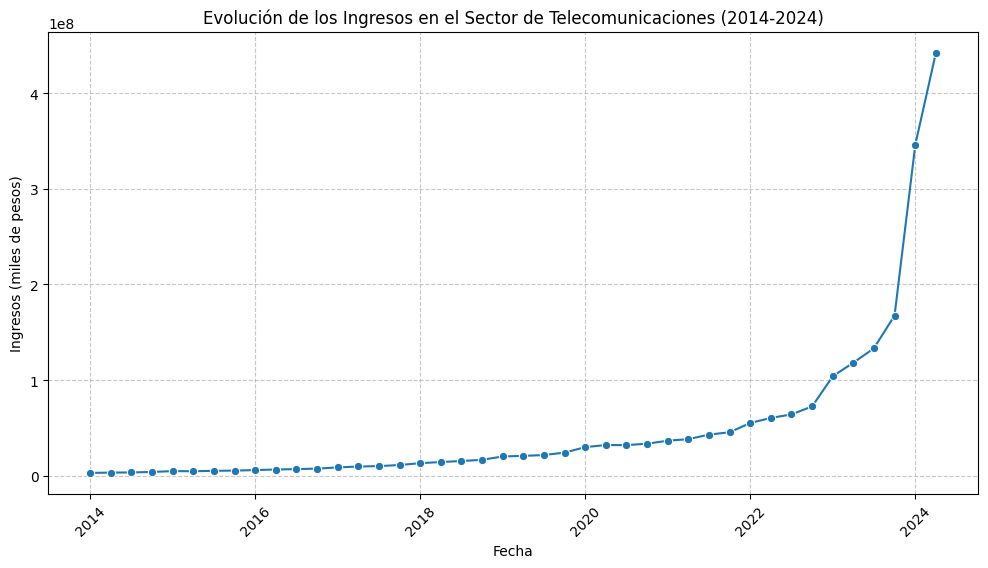

In [106]:
# Ordenar los datos por 'Año' y 'Trimestre' para graficar de manera adecuada
df6 = df6.sort_values(by=['Año', 'Trimestre'])

# Gráfico de la evolución de los ingresos
plt.figure(figsize=(12, 6))
sns.lineplot(data=df6, x='Fecha', y='Ingresos (miles de pesos)', marker='o')
plt.xticks(rotation=45)
plt.title('Evolución de los Ingresos en el Sector de Telecomunicaciones (2014-2024)')
plt.xlabel('Fecha')
plt.ylabel('Ingresos (miles de pesos)')
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.show()

Interpretación:
- El gráfico muestra un crecimiento acelerado de los ingresos del sector telecomunicaciones a partir del 2020, esto podría estar relacionado con factores como, la Pandemia de COVID-19, que aceleró la digitalización de la ecnomía y la sociedad, aumentando la demana de servicios de internet, telefonía móvil y otros serviciso digitales.
- De acuerdo al análisis esto también estaria relacionado con la inversión en tecnologías mas modernas como fibra óptica.

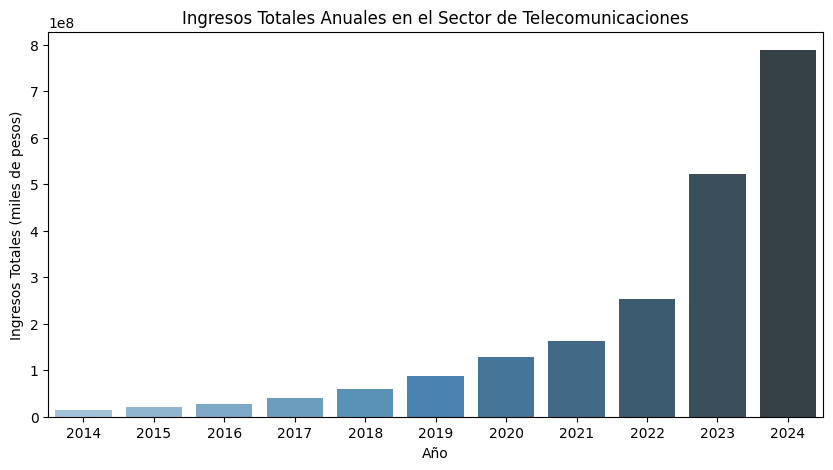

In [107]:
# Calcular ingresos totales por año
ingresos_anuales = df6.groupby('Año')['Ingresos (miles de pesos)'].sum().reset_index()

# Gráfico de ingresos anuales
plt.figure(figsize=(10, 5))
sns.barplot(data=ingresos_anuales, x='Año', y='Ingresos (miles de pesos)', palette='Blues_d')
plt.title('Ingresos Totales Anuales en el Sector de Telecomunicaciones')
plt.xlabel('Año')
plt.ylabel('Ingresos Totales (miles de pesos)')
plt.show()

Interpretación:

- El gráfico muestra un crecimiento sostenido y acelerado en los ingresos del sector de telecomunicaciones en Argentina desde 2014 hasta 2024. Esta tendencia al alza indica una expansión significativa en la industria, reflejando un aumento en la demanda y adopción de servicios de telecomunicaciones por parte de la población. Sin embargo, este crecimiento podría verse afectado por facores externos como la inflación que actualmente presenta el país, por lo que es recomendable realizar un análisis más profundo de los ingresos.

---

## 5. Conclusiones:

- En cuanto a la velocidad de internet, a través del análisis se ha observado una marcada desigualdad entre las provincias de Argentina. Las provincias más desarrolladas, como la Ciudad Autónoma de Buenos Aires y la provincia de Buenos Aires, cuentan con una infraestructura de telecomunicaciones más avanzada y, por ende, ofrecen velocidades de conexión más altas. Esto evidencia una brecha digital entre las diferentes provincias del país.

- Asimismo existe un gran potencial para mejorar la velocidad de internet en muchas provincias, especialmente en aquellas con velocidades más bajas.

- Se evidencia una clara evolución en las tecnologías de acceso a internet en Argentina. La fibra óptica es la tecnología predominante, desplazando gradualmente al ADSL y consolidándose como la opción preferida para aquellos que buscan velocidades de conexión más altas. El cablemodem, si bien ha mantenido una participación importante, muestra signos de saturación en su crecimiento. Por otro lado, tecnologías como el wireless y otras alternativas aún representan una porción minoritaria del mercado. Esta transición hacia tecnologías de mayor capacidad refleja la creciente demanda de servicios digitales que requieren conexiones más rápidas y estables, y plantea oportunidades para la expansión de la infraestructura de telecomunicaciones en áreas donde aún existen brechas digitales, ya que las tecnologías de acceso a internet en Argentina muestra una clara concentración en las grandes ciudades.

- El análisis de la penetración de internet por cada 100 habitantes en Argentina revela una tendencia de crecimiento sostenido a lo largo del período estudiado, evidenciando un avance significativo en la conectividad a nivel nacional. Sin embargo, esta expansión no ha sido homogénea, ya que se observa una marcada disparidad entre las distintas provincias.

- El análisis de la penetración de internet en hogares argentinos revela una tendencia creciente sostenida a lo largo del 2014 - 2024, evidenciando un mayor acceso a servicios de conectividad en todo el territorio nacional. Sin embargo, se observa una gran disparidad entre las diferentes provincias, lo que refleja una brecha digital persistente.

- El análisis de la distribución de velocidades de internet en Argentina revela una tendencia clara hacia la adopción de conexiones más rápidas y de mayor capacidad. 



## 6. Recomendaciones:

- La inversión en infraestructura de telecomunicaciones es un factor clave para mejorar la velocidad de internet, por ello es fundamental seguir invertirtiendo en infraestructura de fibra óptica, especialmente en zonas rurales y urbanas con menor conectividad.

## 7. Descarga de los DF

In [108]:
# df1: 
df1.to_csv('D:/2024/HenryData/PI_2/Py_Telecomunicaciones/Datasets/df1_veloc.csv', sep=',', index= False)
#D:\2024\HenryData\PI_2\Py_Telecomunicaciones\Datasets

In [109]:
df2.to_csv('D:/2024/HenryData/PI_2/Py_Telecomunicaciones/Datasets/df2_tecn.csv', sep=',', index= False)

In [110]:
df3.to_csv('D:/2024/HenryData/PI_2/Py_Telecomunicaciones/Datasets/df3_penetracion_pobc.csv', sep=',', index= False)

In [111]:
df4.to_csv('D:/2024/HenryData/PI_2/Py_Telecomunicaciones/Datasets/df4_penetracion_hog.csv', sep=',', index= False)

In [112]:
df5.to_csv('D:/2024/HenryData/PI_2/Py_Telecomunicaciones/Datasets/df5_veloc_rang.csv', sep=',', index= False)

In [113]:
# Descarga de los KPIs
df_kpi_1.to_csv('D:/2024/HenryData/PI_2/Py_Telecomunicaciones/Datasets/df_kpi_1.csv', sep=',', index=False)

In [114]:
df_kpi_2.to_csv('D:/2024/HenryData/PI_2/Py_Telecomunicaciones/Datasets/df_kpi_2.csv', sep=',', index=False)

In [115]:
df_kpi_3.to_csv('D:/2024/HenryData/PI_2/Py_Telecomunicaciones/Datasets/df_kpi_3.csv', sep=',', index=False)